<a href="https://colab.research.google.com/github/Mhoover41/Stroke-Prediction/blob/main/Stroke_Prediction_Project_2_Melissa_Hoover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Stroke Prediction**


- **Author:** Melissa Hoover

#**Project Overview**

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Data Source:  https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Data Link: [healthcare-dataset-stroke-data.csv](https://github.com/Mhoover41/Stroke-Prediction/files/11501796/healthcare-dataset-stroke-data.csv)

##Data Dictionary

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

**Note:** "Unknown" in smoking_status means that the information is unavailable for this patient

#**Load and Inspect Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### **Imports**

In [2]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# MatplotLib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#Seaborn
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_sampler_pipeline

# Classification Metrics

from sklearn.metrics import (ConfusionMatrixDisplay,
                             PrecisionRecallDisplay,
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)

# Set global scikit-learn configuration
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}
import warnings
warnings.filterwarnings('ignore')

##### **Loading Data**

In [3]:
#Load the data file
filename= '/content/drive/MyDrive/Project 2/healthcare-dataset-stroke-data.csv'
df= pd.read_csv(filename)

**Inspecting Data**

In [4]:
# Display the first 5 rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


  How many Rows/Columns:

In [5]:
# Display the number of rows and columns
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 5110 rows, and 12 columns
The rows represent 5110 observations, and the columns represent 11 features and 1 target variable.


## **Display Column Names, Count of Non-Null Values, and Data Types**

In [6]:
# Display index, columns, null count, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#**Clean Data**



Checking the data types:

In [7]:
# Display data types
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

- The dataset has a combination of categorical (object) and numeric (float and int) data types.
- No mismatched data types were found.

In [8]:
# Capitalize all columns and remove any underscores
df.columns = df.columns.str.capitalize().str.replace('_', ' ')

In [9]:
df.columns

Index(['Id', 'Gender', 'Age', 'Hypertension', 'Heart disease', 'Ever married',
       'Work type', 'Residence type', 'Avg glucose level', 'Bmi',
       'Smoking status', 'Stroke'],
      dtype='object')

In [10]:
 #Rename some of the columns to have spaces between the words
df.rename(columns={
    'Heartdisease': 'Heart Disease',
    'Evermarried': 'Ever Married',
    'Worktype': 'Work Type',
    'Residencetype': 'Residence Type',
    'Avgglucoselevel': 'Avg Glucose Level',
    'Smokingstatus': 'Smoking Status',
   }, inplace=True)

In [11]:
# Capitalize all the words in the column names
df.columns = df.columns.str.title()

In [12]:
df.columns = df.columns.str.replace('Bmi', 'BMI')

In [13]:
df.columns

Index(['Id', 'Gender', 'Age', 'Hypertension', 'Heart Disease', 'Ever Married',
       'Work Type', 'Residence Type', 'Avg Glucose Level', 'BMI',
       'Smoking Status', 'Stroke'],
      dtype='object')

Identifying missing values:

In [14]:
#Display total number of missing values
missing_values= df.isna().sum().sum()
print(f"Total number of missing values is {missing_values}")

Total number of missing values is 201


In [15]:
# Display the count of missing values for each column
df.isna().sum()

Id                     0
Gender                 0
Age                    0
Hypertension           0
Heart Disease          0
Ever Married           0
Work Type              0
Residence Type         0
Avg Glucose Level      0
BMI                  201
Smoking Status         0
Stroke                 0
dtype: int64

In [16]:
# Display the percentage of missing values for each column
df.isna().sum()/len(df) * 100

Id                   0.000000
Gender               0.000000
Age                  0.000000
Hypertension         0.000000
Heart Disease        0.000000
Ever Married         0.000000
Work Type            0.000000
Residence Type       0.000000
Avg Glucose Level    0.000000
BMI                  3.933464
Smoking Status       0.000000
Stroke               0.000000
dtype: float64

There is 3.9% missing values in bmi column.  This will be imputed with SimpleImputer in our preprocessing steps.

Checking for Duplicates:

In [17]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


Drop Unnecessary Columns:

In [18]:
#Drop column
df.drop(columns = ['Id'], inplace=True)

In [19]:
df.columns

Index(['Gender', 'Age', 'Hypertension', 'Heart Disease', 'Ever Married',
       'Work Type', 'Residence Type', 'Avg Glucose Level', 'BMI',
       'Smoking Status', 'Stroke'],
      dtype='object')

- I have confirmed the 'id' column is now dropped.

# Statistics Function

In [20]:
# Create a function to display supplemental statistics
def column_statistics(column_name, max_unique_values_to_disply=20):
 # Display the count of missing values for this column
 print(f'Missing Values: {df[column_name].isna().sum()} ({round((df[column_name].isna().sum())/(df.shape[0])*100,1)})%')

 # Determine Outliers - Only if this is a numeric column
 if (df[column_name].dtype == 'int64') | (df[column_name].dtype == 'float64'):
 # Create outlier filters
  q1 = df[column_name].quantile(0.25) # 25th percentile
  q3 = df[column_name].quantile(0.75) # 75th percentile
  iqr = q3 - q1 # Interquartile range
  low_limit = q1 - (1.5 * iqr) # low limit
  high_limit = q3 + (1.5 * iqr) # high limit
 # Create outlier dataframes
 low_df = df[(df[column_name] < low_limit)]
 high_df = df[(df[column_name] > high_limit)]
 # Calculate the outlier counts and percentages
 low_oulier_count = low_df.shape[0]
 low_outlier_percentge = round(((low_oulier_count)/(df.shape[0])*100),1)
 high_oulier_count = high_df.shape[0]
 high_outlier_percentge = round(((high_oulier_count)/(df.shape[0])*100),1)
 # Display the outlier counts.
 print(f'Outliers: {low_oulier_count} ({low_outlier_percentge})% low, {high_oulier_count} ({high_outlier_percentge})% high')

 # Display the count of unique values for this column
 print(f'Unique values: {df[column_name].nunique()}')

 # Display the unique values including Nan and their counts for this column,
 # if the number of unique values is below the function parameter
 if df[column_name].nunique() < max_unique_values_to_disply:
  print(df[column_name].value_counts(dropna=False))

 # Return the dataframe with outliers on the high side
 return high_df


##Numerical Columns
- Check for inconsistencies in all columns that are Integer or Float data types
- Check for unusual or impossible values.
- Check for Outliers

In [21]:
#View summary statistics
df.describe(include='number')

,Age,Hypertension,Heart Disease,Avg Glucose Level,BMI,Stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- The only unusual values I see are for the age.  An age of .08 doesn't make sense.  Lets investigate further.

### Age Column

In [22]:
df['Age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: Age, Length: 104, dtype: int64

- There are some floats we need to convert to whole numbers.

In [23]:
df['Age'] = df['Age'].round(0)

In [24]:
df['Age'].value_counts()

78.0    102
57.0     95
2.0      90
52.0     90
54.0     87
       ... 
10.0     35
4.0      34
7.0      32
6.0      24
0.0      20
Name: Age, Length: 83, dtype: int64

I can see we now have 20 ages that are 0, lets round those up to 1.

In [25]:
df['Age'] = df['Age'].replace(0, 1)

In [26]:
df['Age'].value_counts()

78.0    102
57.0     95
2.0      90
52.0     90
54.0     87
       ... 
11.0     36
10.0     35
4.0      34
7.0      32
6.0      24
Name: Age, Length: 82, dtype: int64

In [27]:
df['Age'].describe()

count    5110.000000
mean       43.230528
std        22.605333
min         1.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: Age, dtype: float64

- We now have a minimum age of 1 and a maximum age of 82

### Hypertension Column

In [28]:
df['Hypertension'].unique()

array([0, 1])

### Heart Disease Column

In [29]:
df['Heart Disease'].unique()

array([1, 0])

### Average Glucose Level Column

In [30]:
df['Avg Glucose Level'].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

### BMI Column

In [31]:
df['BMI'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

- There may be some outliers here lets look at a box plot to see where they are later on

### Stroke Column

In [32]:
df['Stroke'].unique()

array([1, 0])

## Categorical Columns
- Check for inconsistencies in all columns that are object data types


In [33]:
#View Summary Statistics for Object data types
df.describe(include='object')

,Gender,Ever Married,Work Type,Residence Type,Smoking Status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [34]:
from scipy.sparse import data
# Create a series of the datatypes
data_types = df.dtypes
# Create a filter to select only the object datatypes
object_data_types = data_types[(data_types == 'object')]
# Display the series of object datatypes
object_data_types

Gender            object
Ever Married      object
Work Type         object
Residence Type    object
Smoking Status    object
dtype: object

In [35]:
## Display the index of object datatypes
object_data_types.index

Index(['Gender', 'Ever Married', 'Work Type', 'Residence Type',
       'Smoking Status'],
      dtype='object')

In [36]:
## Loop through the object datatype columns
for column in object_data_types.index:
    ## Print the column name
    print(column)
    ## Print the unique values from the column
    print(df[column].unique())
    ## Print a blank row
    print('\n')

Gender
['Male' 'Female' 'Other']


Ever Married
['Yes' 'No']


Work Type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


Residence Type
['Urban' 'Rural']


Smoking Status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']




- No inconsistencies noted

# **Exploratory Data Analysis**

### Functions

#### Function to Display Histogram and Boxplot

In [37]:
def hist_box_plot(column_name, bin_count):
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(8, 6),
                                    facecolor='w',
                                    gridspec_kw={'height_ratios': [0.75, 0.25]})
    plt.suptitle(f'{column_name}', y=1.02, va='center',
                 fontsize=22, weight='bold')

    # Set the color palette
    color_palette = ['#008B8B', '#0000CD']  # Teal, medium blue

    sns.histplot(data=df, x=column_name, color=color_palette[0], linewidth=2,
                 ax=ax1, bins=bin_count)
    plt.xlabel(column_name, fontsize=16, weight='bold')
    plt.xticks(weight='bold')
    ax1.set_ylabel('Instances', fontweight='bold', fontsize=18)
    ax1.tick_params(labelcolor='k', labelsize=10)
    ax1.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))

    for axis in ['top', 'bottom', 'left', 'right']:
        ax1.spines[axis].set_linewidth(3)

    sns.boxplot(data=df, x=column_name, width=.5, color=color_palette[1], ax=ax2,
                medianprops={'color': 'k', 'linewidth': 2},
                whiskerprops={'color': 'k', 'linewidth': 2},
                boxprops={'facecolor': color_palette[1], 'edgecolor': 'k', 'linewidth': 2},
                capprops={'color': 'k', 'linewidth': 3})

    ax2.tick_params(labelcolor='k', labelsize=10)
    ax2.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
    ax2.spines['bottom'].set_linewidth(2)
    ax2.spines['top'].set_color(None)
    ax2.spines['left'].set_color(None)
    ax2.spines['right'].set_color(None)

    plt.tight_layout()
    plt.show()


#### Function to Display Countplot

In [38]:
def count_plot(column_name, label_order):
    fig, ax = plt.subplots(nrows=1, figsize=(8, 4), facecolor='w')
    plt.title(column_name, fontsize=22, weight='bold')

    # Set the color
    color = '#008080'  # Teal

    sns.countplot(data=df, x=column_name, lw=3, ec='k',
                  color=color, order=label_order)
    plt.xlabel('')
    plt.xticks(weight='bold')
    ax.set_ylabel('Instances', fontweight='bold', fontsize=18)

    ax.tick_params(labelcolor='k', labelsize=12)
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(3)

    plt.tight_layout()
    plt.show()

##Numerical Columns



- For each numeric column, we will visualize the distribution with a histogram and a boxplot.

### Summary Statistics

In [39]:
df.describe()

,Age,Hypertension,Heart Disease,Avg Glucose Level,BMI,Stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.230528,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.605333,0.296607,0.226063,45.283560,7.854067,0.215320
min,1.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Age Column

In [40]:
#Display the descriptive statistics for the column
df['Age'].describe()

count    5110.000000
mean       43.230528
std        22.605333
min         1.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: Age, dtype: float64

In [41]:
# Display supplemental column statistics
column_statistics('Age')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 0 (0.0)% high
Unique values: 82


,Gender,Age,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Avg Glucose Level,BMI,Smoking Status,Stroke


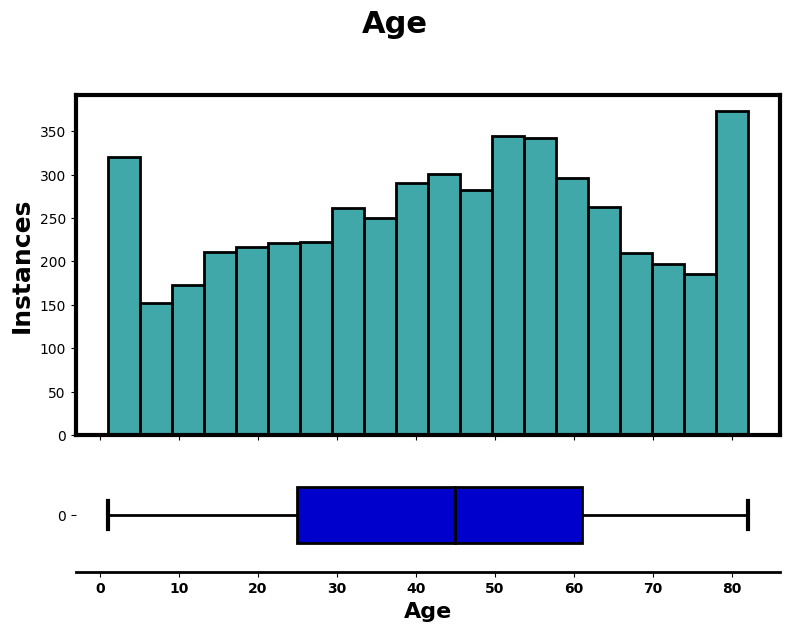

In [42]:
# Utilize function to display histogram and boxplot
hist_box_plot('Age',20)

- There are no outliers and the median Age is 45.

### Average Glucose Level

In [43]:
#Display the descriptive statistics for the column
df['Avg Glucose Level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: Avg Glucose Level, dtype: float64

In [44]:
# Display supplemental column statistics
column_statistics('Avg Glucose Level')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 627 (12.3)% high
Unique values: 3979


,Gender,Age,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Avg Glucose Level,BMI,Smoking Status,Stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5061,Male,41.0,0,0,Yes,Private,Urban,223.78,32.3,never smoked,0
5062,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
5063,Male,39.0,0,0,Yes,Private,Urban,179.38,27.7,Unknown,0
5064,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.3,Unknown,0


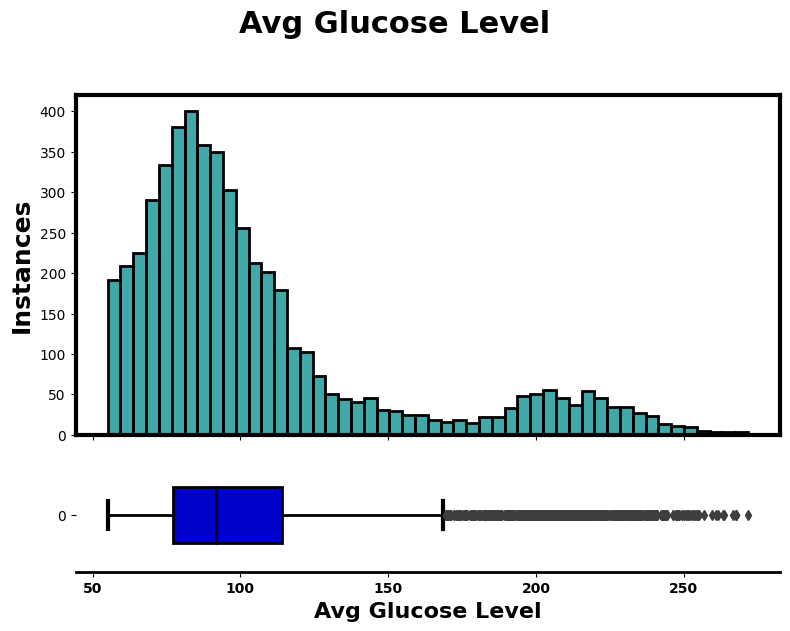

In [45]:
# Use Function to display Histogram and Boxplot
hist_box_plot('Avg Glucose Level', 50);

- This is right skewed.  The maximum average glucose level is 271.  The mean is 106 and median is 92.  There is 12.3% outliers on the high side.  Since this is a signtificant amount I don't want to lose that much data so I will leave the outliers in place.

### BMI Column

In [46]:
#Displaty Summary Statistics for the column
df['BMI'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: BMI, dtype: float64

In [47]:
# Display supplemental column statistics
column_statistics('BMI')

Missing Values: 201 (3.9)%
Outliers: 0 (0.0)% low, 110 (2.2)% high
Unique values: 418


,Gender,Age,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Avg Glucose Level,BMI,Smoking Status,Stroke
21,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
113,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
254,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
258,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
270,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
4858,Female,43.0,0,0,Yes,Private,Urban,100.88,47.6,smokes,0
4906,Female,53.0,0,0,Yes,Private,Urban,70.51,54.1,never smoked,0
4952,Male,51.0,1,0,Yes,Self-employed,Rural,211.83,56.6,never smoked,0
5009,Female,50.0,0,0,Yes,Self-employed,Rural,126.85,49.5,formerly smoked,0


- I have decided to remove these high outliers as a BMI of over 45 is extremely unlikely.

In [48]:
def remove_high_outliers(column_name):
    # Determine outliers - Only if this is a numeric column
    if (df[column_name].dtype == 'int64') or (df[column_name].dtype == 'float64'):
        # Create outlier filters
        q1 = df[column_name].quantile(0.25)  # 25th percentile
        q3 = df[column_name].quantile(0.75)  # 75th percentile
        iqr = q3 - q1  # Interquartile range
        low_limit = q1 - (1.5 * iqr)  # Low limit
        high_limit = q3 + (1.5 * iqr)  # High limit

        # Create outlier dataframes
        low_df = df[(df[column_name] < low_limit)]
        high_df = df[(df[column_name] > high_limit)]

        # Drop the high outliers
        df.drop(high_df.index, inplace=True)

        # Display the count of removed outliers
        outlier_count = high_df.shape[0]
        outlier_percentage = round((outlier_count / df.shape[0]) * 100, 1)
        print(f'Dropped {outlier_count} ({outlier_percentage}%) high outliers')

# Call the function to remove high outliers for a specific column
column_name = 'BMI'  # Replace with the actual name of the column
remove_high_outliers(column_name)


Dropped 110 (2.2%) high outliers


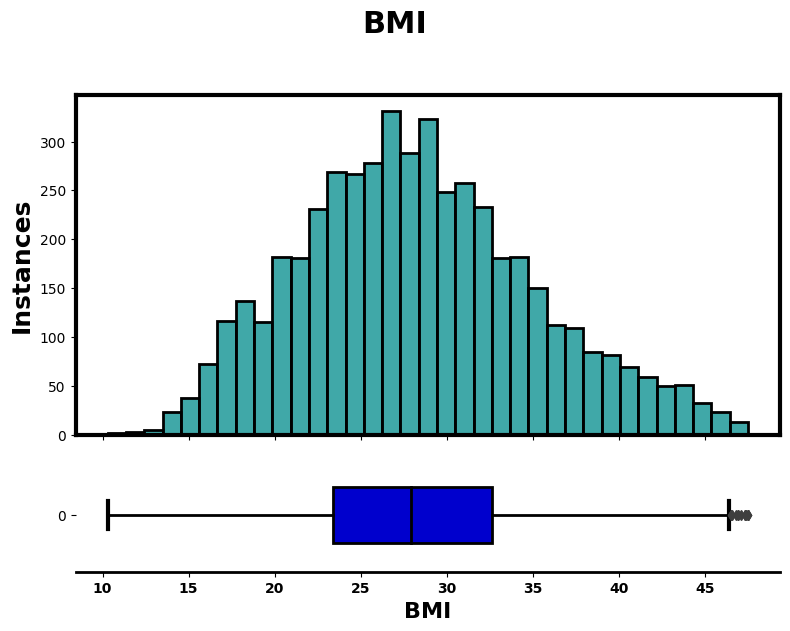

In [49]:
# Use Function to display Histogram and Boxplot
hist_box_plot('BMI','auto');

In [50]:
df['BMI'].describe()

count    4799.000000
mean       28.313586
std         6.841250
min        10.300000
25%        23.400000
50%        27.900000
75%        32.600000
max        47.500000
Name: BMI, dtype: float64

- The mean is now 28 and the median is 27.9 which represents a normal distribution.

##Categorical Columns

- For each categorical column we will display the value counts, descriptive statistics, and a count plot to visualize the data.

### Summary Statistics

In [51]:
df.describe(exclude=('number'))

,Gender,Ever Married,Work Type,Residence Type,Smoking Status
count,5000,5000,5000,5000,5000
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2909,3268,2848,2547,1844


###Hypertension Column

In [52]:
# Replace names so it's easier to understand and understand graphs
df['Hypertension'].replace({0: 'No', 1: 'Yes'}, inplace=True)

In [53]:
#Display the value counts for the column
df['Hypertension'].value_counts()

No     4523
Yes     477
Name: Hypertension, dtype: int64

In [54]:
#Display the normalized value counts for the column
df['Hypertension'].value_counts(normalize = True)

No     0.9046
Yes    0.0954
Name: Hypertension, dtype: float64

In [55]:
#Display the normalized value counts for the column
df['Hypertension'].describe()

count     5000
unique       2
top         No
freq      4523
Name: Hypertension, dtype: object

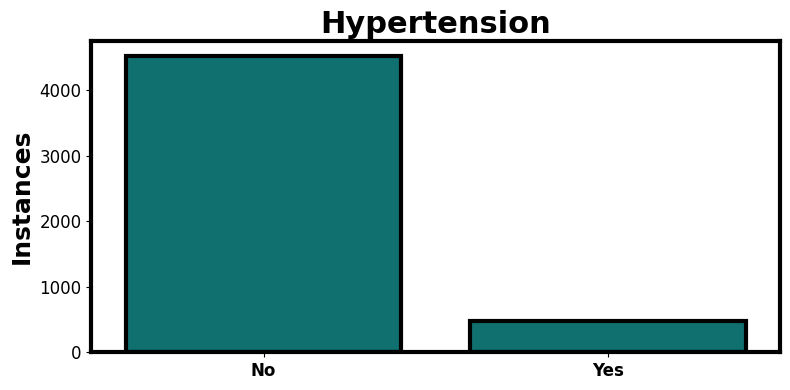

In [56]:
# Utilize function to display count plot
count_plot('Hypertension', ['No', 'Yes'])

 - The majority do not have hypertension.

### Heart Disease Column

In [57]:
# Replace names so it's easier to understand and understand graphs
df['Heart Disease'].replace({0: 'No', 1: 'Yes'}, inplace=True)

In [58]:
#Display the value counts for the column
df['Heart Disease'].value_counts()

No     4725
Yes     275
Name: Heart Disease, dtype: int64

In [59]:
#Display the normalized value counts for the column
df['Heart Disease'].value_counts(normalize = True)

No     0.945
Yes    0.055
Name: Heart Disease, dtype: float64

 - With this being only 5%, I would remove the Yes and then it would be a single column of No values.  This column would not be a good indicator of stroke with all values being No.  I will remove the column.

In [60]:
#Drop column
df.drop(columns = ['Heart Disease'], inplace=True)

In [61]:
df.columns

Index(['Gender', 'Age', 'Hypertension', 'Ever Married', 'Work Type',
       'Residence Type', 'Avg Glucose Level', 'BMI', 'Smoking Status',
       'Stroke'],
      dtype='object')

- Confirmed Heart Disease column is now dropped.

###Gender Column

In [62]:
#Display the value counts for the column
df['Gender'].value_counts()

Female    2909
Male      2090
Other        1
Name: Gender, dtype: int64

In [63]:
#Display the normalized value counts for the column
df['Gender'].value_counts(normalize = True)

Female    0.5818
Male      0.4180
Other     0.0002
Name: Gender, dtype: float64

In [64]:
#Display the descriptive statistics for the column
df['Gender'].describe()

count       5000
unique         3
top       Female
freq        2909
Name: Gender, dtype: object

- With "Other" being only 1 value, I will remove that row.

In [65]:
#Removing all rows with Never_worked
df.drop(df[df['Gender'] == 'Other'].index, inplace=True)

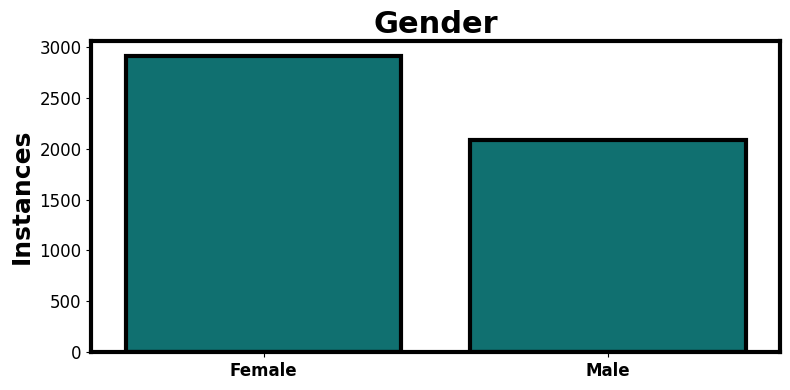

In [66]:
# Utilize function to display count plot
count_plot('Gender', ['Female', 'Male'])

- The distribution is 63% female and 37% male.

### Ever Married Column

In [67]:
#Display the value counts for the column
df['Ever Married'].value_counts()

Yes    3268
No     1731
Name: Ever Married, dtype: int64

In [68]:
#Display the normalized value counts for the column
df['Ever Married'].value_counts(normalize = True)

Yes    0.653731
No     0.346269
Name: Ever Married, dtype: float64

In [69]:
#Display the descriptive statistics for the column
df['Ever Married'].describe()

count     4999
unique       2
top        Yes
freq      3268
Name: Ever Married, dtype: object

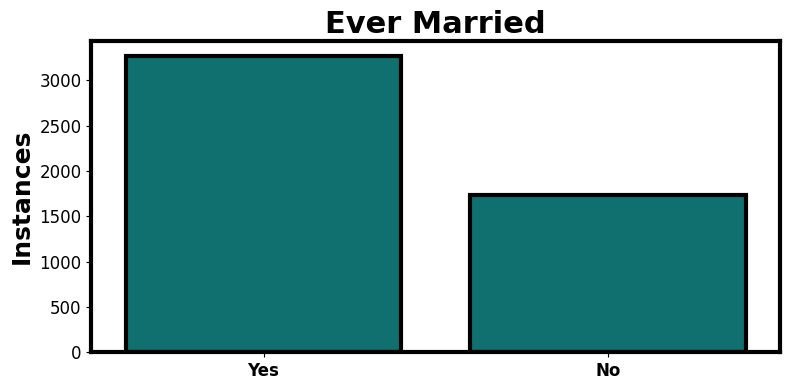

In [70]:
# Utilize function to display count plot
count_plot('Ever Married', ['Yes', 'No'])

### Work Type Column

In [71]:
#Display the value counts for the column
df['Work Type'].value_counts()

Private          2847
Self-employed     803
children          687
Govt_job          640
Never_worked       22
Name: Work Type, dtype: int64

In [72]:
#Display the normalized value counts for the column
df['Work Type'].value_counts(normalize = True)

Private          0.569514
Self-employed    0.160632
children         0.137427
Govt_job         0.128026
Never_worked     0.004401
Name: Work Type, dtype: float64

- With Never Worked being under 1%, we will remove that type as it will not be useful in our modeling.

In [73]:
#Removing all rows with Never_worked
df.drop(df[df['Work Type'] == 'Never_worked'].index, inplace=True)

In [74]:
#Display the normalized value counts for the column
df['Work Type'].value_counts(normalize = True)

Private          0.572031
Self-employed    0.161342
children         0.138035
Govt_job         0.128592
Name: Work Type, dtype: float64

- Confirmed Never worked is now removed.

In [75]:
#Display the descriptive statistics for the column
df['Work Type'].describe()

count        4977
unique          4
top       Private
freq         2847
Name: Work Type, dtype: object

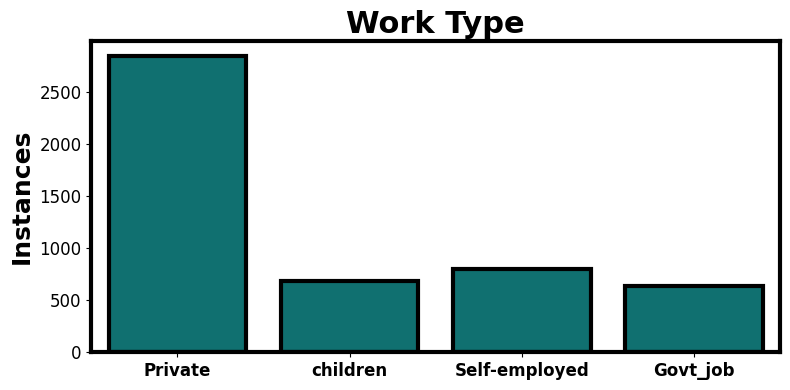

In [76]:
# Utilize function to display count plot
count_plot('Work Type', ['Private', 'children', 'Self-employed', 'Govt_job'])

 - The majority of people have a Private work type followed by self-employed.

### Residence Type Column

In [77]:
#Display the value counts for the column
df['Residence Type'].value_counts()

Urban    2532
Rural    2445
Name: Residence Type, dtype: int64

In [78]:
#Display the normalized value counts for the column
df['Residence Type'].value_counts(normalize = True)

Urban    0.50874
Rural    0.49126
Name: Residence Type, dtype: float64

In [79]:
#Display the descriptive statistics for the column
df['Residence Type'].describe()

count      4977
unique        2
top       Urban
freq       2532
Name: Residence Type, dtype: object

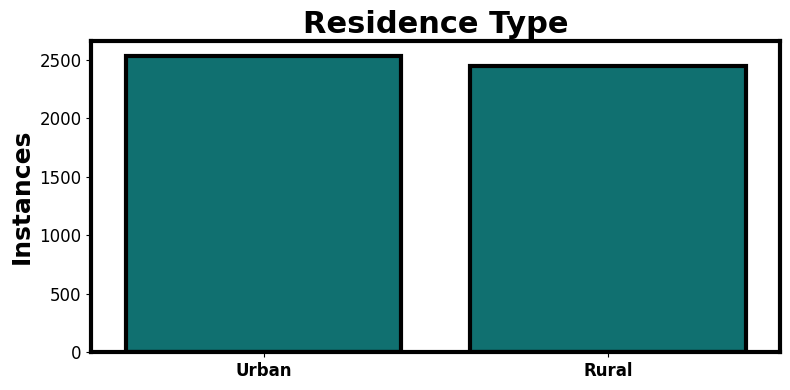

In [80]:
# Utilize function to display count plot
count_plot('Residence Type', ['Urban', 'Rural'])

- These are distributed fairly evenly with Urban being slightly higher.

### Smoking Status Column

In [81]:
#Display the value counts for the column
df['Smoking Status'].value_counts()

never smoked       1830
Unknown            1512
formerly smoked     862
smokes              773
Name: Smoking Status, dtype: int64

In [82]:
#Display the normalized value counts for the column
df['Smoking Status'].value_counts(normalize = True)

never smoked       0.367691
Unknown            0.303797
formerly smoked    0.173197
smokes             0.155314
Name: Smoking Status, dtype: float64

In [83]:
#Display the descriptive statistics for the column
df['Smoking Status'].describe()

count             4977
unique               4
top       never smoked
freq              1830
Name: Smoking Status, dtype: object

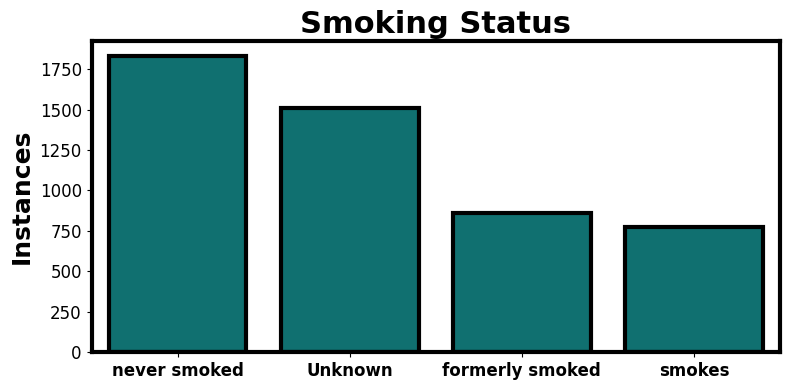

In [84]:
# Utilize f'unction to display count plot
count_plot('Smoking Status', ['never smoked', 'Unknown', 'formerly smoked','smokes'])

- Never smoked and unknown are about the same followed by formerly smoked.

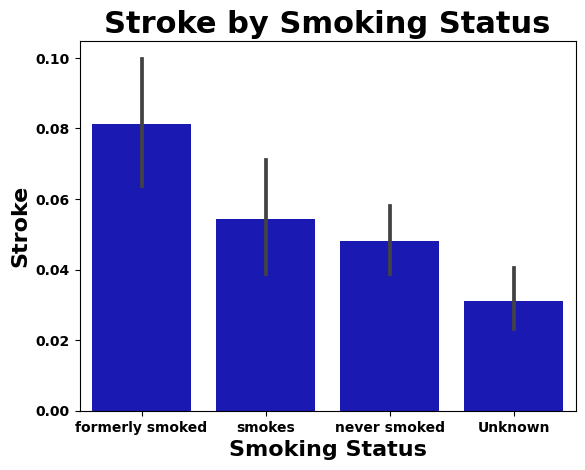

In [85]:
# Choose a color palette
color_palette = ['#0000CD']  # Teal, Medium blue

# Specify the order of the smoking categories
order = ['formerly smoked', 'smokes', 'never smoked', 'Unknown']

# Plot a bar graph with Smoking Status and Stroke in order
sns.barplot(x='Smoking Status', y='Stroke', data=df, palette=color_palette, order=order)

# Add title and format axes
plt.title('Stroke by Smoking Status', fontsize=22, fontweight='bold')
plt.xlabel('Smoking Status', fontweight='bold', fontsize=16)
plt.ylabel('Stroke', fontweight='bold', fontsize=16)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Show the figure
plt.show()

### Stroke Column

In [86]:
# Replace names so it's easier to understand and understand graphs
df['Stroke'].replace({0: 'No', 1: 'Yes'}, inplace=True)

In [87]:
#Display the value counts for the column
df['Stroke'].value_counts()

No     4730
Yes     247
Name: Stroke, dtype: int64

In [88]:
#Display the normalized value counts for the column
df['Stroke'].value_counts(normalize = True)

No     0.950372
Yes    0.049628
Name: Stroke, dtype: float64

In [89]:
#Display the descriptive statistics for the column
df['Stroke'].describe()

count     4977
unique       2
top         No
freq      4730
Name: Stroke, dtype: object

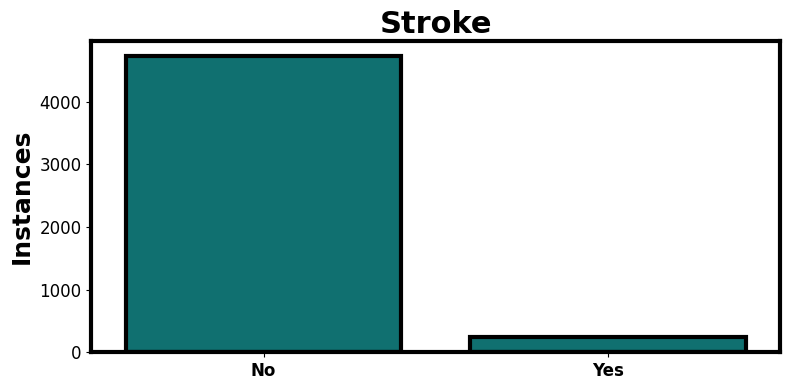

In [90]:
# Utilize function to display count plot
count_plot('Stroke', ['No', 'Yes'])

- We can see this is a very unbalanced dataset with less than 1% having a stroke.

# Explanatory Data Analysis

## Correlation Heatmap

In [91]:
# Define a dictionary with key/value pairs and use it to replace values
dict = {"No": 0, "Yes": 1}
df.replace({'Stroke': dict}, inplace=True)
df.replace({'Hypertension': dict}, inplace=True)
df.replace({'Ever Married': dict}, inplace=True)

In [92]:
df.dtypes

Gender                object
Age                  float64
Hypertension           int64
Ever Married           int64
Work Type             object
Residence Type        object
Avg Glucose Level    float64
BMI                  float64
Smoking Status        object
Stroke                 int64
dtype: object

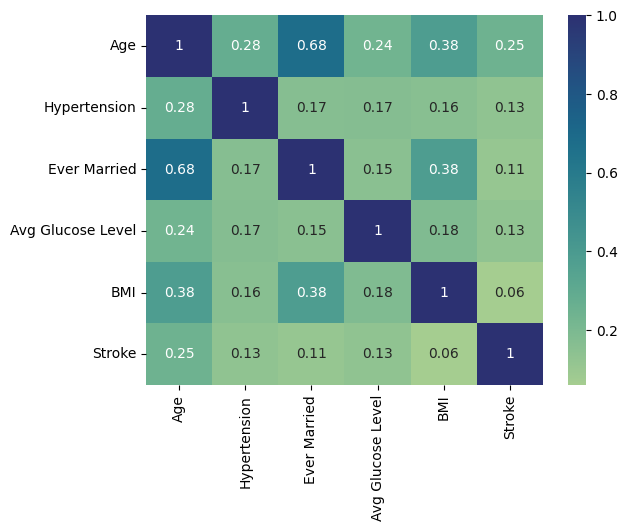

In [93]:
corr = df.corr()
sns.heatmap(corr, cmap = 'crest', annot = True) ;

- Age has the highest correlation to Stroke.

## Age by Hypertension with Stroke Bar Plot

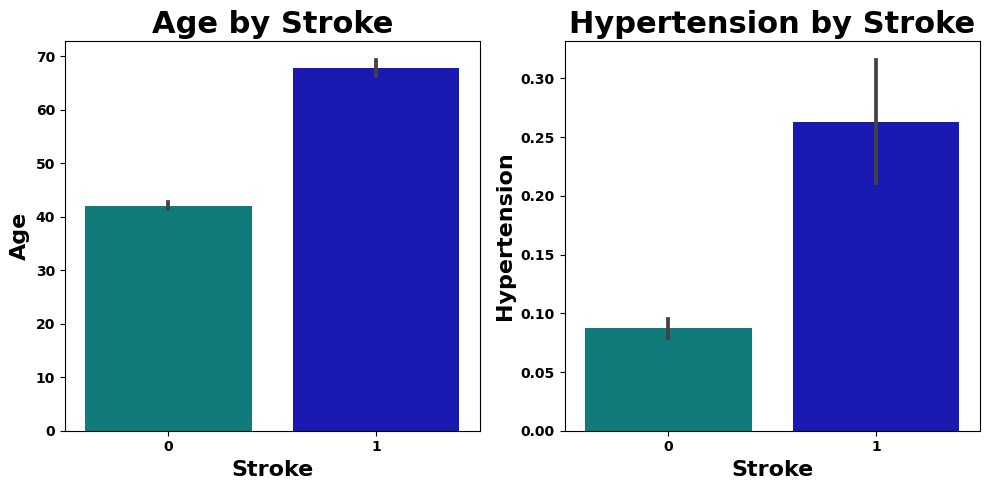

In [94]:
color_palette = ['#008B8B', '#0000CD']  # Teal, Medium blue

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# Plot the first graph on the left subplot
plt.subplot(1, 2, 1)
sns.barplot(x='Stroke', y='Age', data=df, palette=color_palette)

# Add title and format axes
plt.title('Age by Stroke', fontsize=22, fontweight='bold')
plt.xlabel('Stroke', fontweight='bold', fontsize=16)
plt.ylabel('Age', fontweight='bold', fontsize=16)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Plot the second graph on the right subplot
plt.subplot(1, 2, 2)
sns.barplot(x='Stroke', y='Hypertension', data=df, palette=color_palette)

# Add title and format axes
plt.title('Hypertension by Stroke', fontsize=22, fontweight='bold')
plt.xlabel('Stroke', fontweight='bold', fontsize=16)
plt.ylabel('Hypertension', fontweight='bold', fontsize=16)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the figure
plt.show()

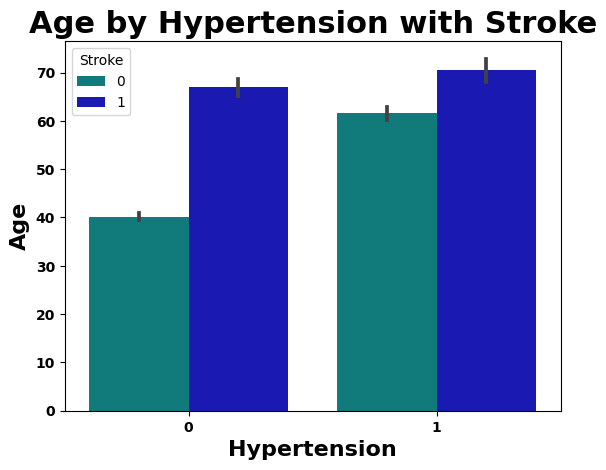

In [95]:
color_palette = ['#008B8B', '#0000CD']  # Teal, Medium blue

sns.barplot(x='Hypertension', y='Age', hue='Stroke', data=df, palette=color_palette)

# Add title and format axes
plt.title('Age by Hypertension with Stroke', fontsize=22, fontweight='bold')
plt.xlabel('Hypertension', fontweight='bold', fontsize=16)
plt.ylabel('Age', fontweight='bold', fontsize=16)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

- More strokes occur with higher ages.  Hypertension does not appear to be correlated with stroke.

##Avg Glucose Level with Stroke Bar Plot

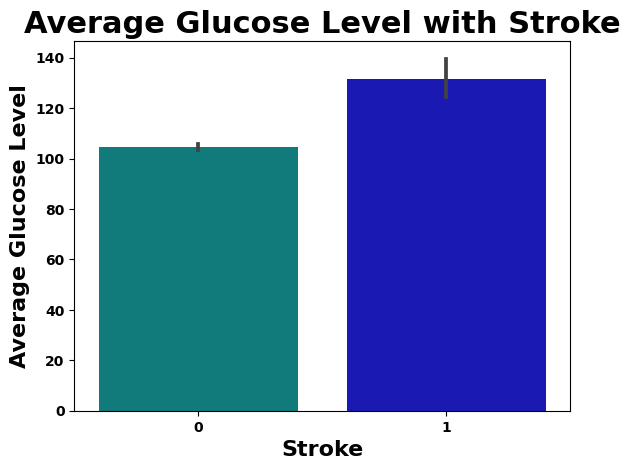

In [96]:
color_palette = ['#008B8B', '#0000CD']  # Teal, Medium blue

sns.barplot(x='Stroke', y='Avg Glucose Level', data=df, palette=color_palette)

# Add title and format axes
plt.title('Average Glucose Level with Stroke', fontsize=22, fontweight='bold')
plt.xlabel('Stroke', fontweight='bold', fontsize=16)
plt.ylabel('Average Glucose Level', fontweight='bold', fontsize=16)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

- More strokes occur with higher Avg Glucose Levels.

## BMI by Stroke Bar Plot

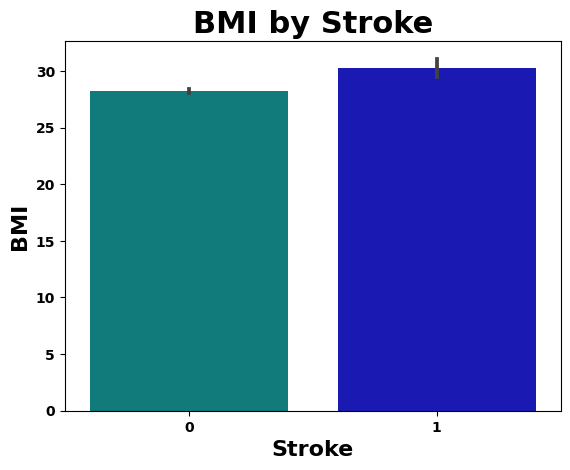

In [97]:
color_palette = ['#008B8B', '#0000CD']  # Teal, Medium blue

sns.barplot(x='Stroke', y='BMI', data=df, palette=color_palette)

# Add title and format axes
plt.title('BMI by Stroke', fontsize=22, fontweight='bold')
plt.xlabel('Stroke', fontweight='bold', fontsize=16)
plt.ylabel('BMI', fontweight='bold', fontsize=16)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

- BMI is not correlated with Stroke, which we can also confirm with our heatmap.

## Stroke by Work Type

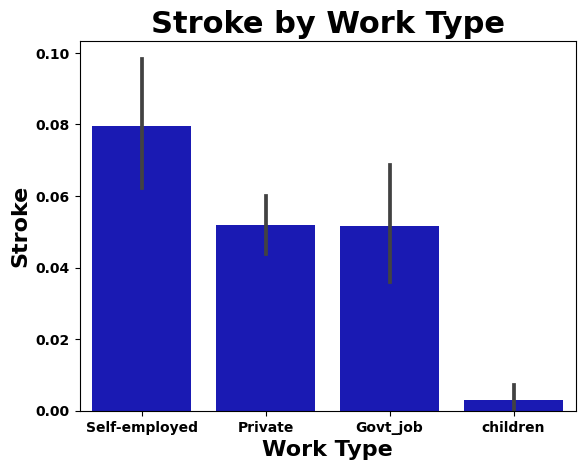

In [126]:
# Choose a color palette
color_palette = ['#0000CD']  # Teal, Medium blue

# Specify the order of the work types
order = ['Self-employed', 'Private', 'Govt_job', 'children']

# Plot a bar graph with Work Type and Stroke in order
sns.barplot(x='Work Type', y='Stroke', data=df, palette=color_palette, order=order)

# Add title and format axes
plt.title('Stroke by Work Type', fontsize=22, fontweight='bold')
plt.xlabel('Work Type', fontweight='bold', fontsize=16)
plt.ylabel('Stroke', fontweight='bold', fontsize=16)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Show the figure
plt.show()

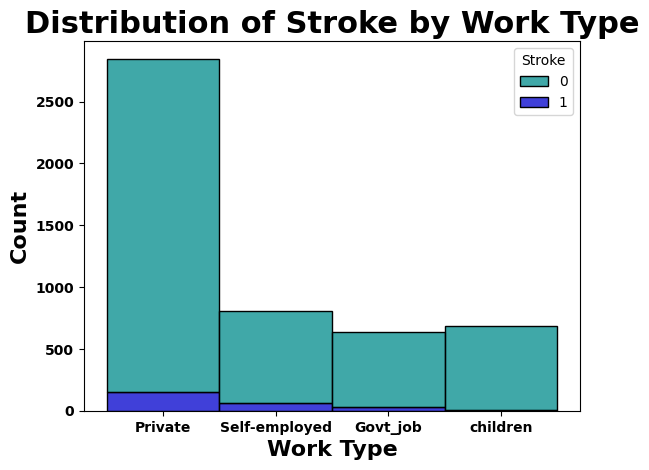

In [122]:
color_palette = ['#008B8B', '#0000CD']  # Teal, Medium blue

sns.histplot(data=df, x="Work Type", hue="Stroke", multiple= 'stack', palette=color_palette)

# Add title and format axes
plt.title('Distribution of Stroke by Work Type', fontsize=22, fontweight='bold')
plt.xlabel('Work Type', fontweight='bold', fontsize=16)
plt.ylabel('Count', fontweight='bold', fontsize=16)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

- The individuals who have Private work type have the most incidence of stroke.

# Check Class Balance

In [99]:
df['Stroke'].value_counts(normalize=False)

0    4730
1     247
Name: Stroke, dtype: int64

In [100]:
df['Stroke'].value_counts(normalize=True)

0    0.950372
1    0.049628
Name: Stroke, dtype: float64

- The target 'stroke', is not balanced, so 'stratify=y' will be used with the Train Test split.

#Model Validation Data Split

In [101]:
#Defining my Target variable which is y and the remaining features X
X = df.drop(columns = ['Stroke'].copy())
y = df['Stroke'].copy()

labels=['No Stroke', 'Stroke']

In [102]:
## Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Preprocessing for Machine Learning

Identify each feature as ordinal, numerical, or nominal

- Ordinal: None
- Numerical: Age, Hypertension, Ever Married, Average Glucose Level, BMI
- Nominal: Gender, Work Type, Residence Type, Smoking Status


In [103]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3732 entries, 1165 to 1158
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             3732 non-null   object 
 1   Age                3732 non-null   float64
 2   Hypertension       3732 non-null   int64  
 3   Ever Married       3732 non-null   int64  
 4   Work Type          3732 non-null   object 
 5   Residence Type     3732 non-null   object 
 6   Avg Glucose Level  3732 non-null   float64
 7   BMI                3588 non-null   float64
 8   Smoking Status     3732 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 291.6+ KB


## Numeric Transformation

In [104]:
# We will use a mean imputer to impute missing values for the numeric columns
# Transformers
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Pipeline
num_pipeline = make_pipeline(mean_imputer, scaler)

# Selector
num_selector = make_column_selector(dtype_include= 'number')

# Tuple
numeric_tuple = (num_pipeline, num_selector)

In [105]:
#Display the numerical columns
num_selector(X_train)

['Age', 'Hypertension', 'Ever Married', 'Avg Glucose Level', 'BMI']

## Nominal Transformation

In [106]:
## using constant for demonstration purpose, You can use strategy = 'most_frequest'

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
# Pipeline
nom_pipeline = make_pipeline(ohe)

nominal_cols =make_column_selector(dtype_include='object')

# Tuple
nominal_tuple = (nom_pipeline, nominal_cols)

In [107]:
#Display the nominal columns
nominal_cols(X_train)

['Gender', 'Work Type', 'Residence Type', 'Smoking Status']

##Instantiate ColumnTransformer

In [108]:
# Create the ColumnTransformer
preprocessor = make_column_transformer(numeric_tuple,
                                       nominal_tuple,
                                       remainder='passthrough', verbose_feature_names_out=False)
# Display the ColumnTransformer
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4db10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4d720>)],
                  verbose_feature_names_out=False)

## Fit and Transform Data

In [109]:
# Fit the ColumnTransformer on training data
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4db10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4d720>)],
                  verbose_feature_names_out=False)

In [110]:
# Transform training and test data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [111]:
X_train_processed

array([[-0.50803211, -0.3206819 ,  0.72294109, ...,  0.        ,
         1.        ,  0.        ],
       [-1.34817252, -0.3206819 , -1.38323857, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.37632622,  3.118355  ,  0.72294109, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.28694252, -0.3206819 , -1.38323857, ...,  0.        ,
         0.        ,  1.        ],
       [-0.41959627, -0.3206819 ,  0.72294109, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.11101872, -0.3206819 ,  0.72294109, ...,  0.        ,
         1.        ,  0.        ]])

##Inspect the Result

In [112]:
#Check for missing values and that data is scaled and one-hot encoded#print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
print(X_train_processed)
X_train_processed.shape

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (3732, 17)


[[-0.50803211 -0.3206819   0.72294109 ...  0.          1.
   0.        ]
 [-1.34817252 -0.3206819  -1.38323857 ...  0.          0.
   0.        ]
 [ 0.37632622  3.118355    0.72294109 ...  1.          0.
   0.        ]
 ...
 [-0.28694252 -0.3206819  -1.38323857 ...  0.          0.
   1.        ]
 [-0.41959627 -0.3206819   0.72294109 ...  0.          1.
   0.        ]
 [ 0.11101872 -0.3206819   0.72294109 ...  0.          1.
   0.        ]]


(3732, 17)

##Convert Preprocessed Array to Dataframes

In [113]:
# Create dataframes from the processed arrays
# First get column names
cols = preprocessor.get_feature_names_out()

In [114]:
X_train_processed_df = pd.DataFrame(X_train_processed,
                          columns = cols,
                          index = X_train.index)

X_test_processed_df = pd.DataFrame(X_test_processed,
                         columns = cols,
                         index = X_test.index)

In [115]:
cols

array(['Age', 'Hypertension', 'Ever Married', 'Avg Glucose Level', 'BMI',
       'Gender_Female', 'Gender_Male', 'Work Type_Govt_job',
       'Work Type_Private', 'Work Type_Self-employed',
       'Work Type_children', 'Residence Type_Rural',
       'Residence Type_Urban', 'Smoking Status_Unknown',
       'Smoking Status_formerly smoked', 'Smoking Status_never smoked',
       'Smoking Status_smokes'], dtype=object)

In [116]:
#View the transformations
X_train_processed_df.describe().round(2)

,Age,Hypertension,Ever Married,Avg Glucose Level,BMI,Gender_Female,Gender_Male,Work Type_Govt_job,Work Type_Private,Work Type_Self-employed,Work Type_children,Residence Type_Rural,Residence Type_Urban,Smoking Status_Unknown,Smoking Status_formerly smoked,Smoking Status_never smoked,Smoking Status_smokes
count,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00,3732.00
mean,0.00,0.00,-0.00,0.00,-0.00,0.58,0.42,0.14,0.57,0.16,0.13,0.49,0.51,0.30,0.17,0.37,0.15
std,1.00,1.00,1.00,1.00,1.00,0.49,0.49,0.34,0.49,0.37,0.34,0.50,0.50,0.46,0.38,0.48,0.36
min,-1.88,-0.32,-1.38,-1.14,-2.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.77,-0.32,-1.38,-0.64,-0.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.07,-0.32,0.72,-0.31,-0.01,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
75%,0.77,-0.32,0.72,0.18,0.61,1.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00
max,1.70,3.12,0.72,3.73,2.88,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [117]:
#View the transformations
X_test_processed_df.describe().round(2)

,Age,Hypertension,Ever Married,Avg Glucose Level,BMI,Gender_Female,Gender_Male,Work Type_Govt_job,Work Type_Private,Work Type_Self-employed,Work Type_children,Residence Type_Rural,Residence Type_Urban,Smoking Status_Unknown,Smoking Status_formerly smoked,Smoking Status_never smoked,Smoking Status_smokes
count,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00,1245.00
mean,-0.03,0.04,-0.00,0.01,-0.03,0.57,0.43,0.11,0.57,0.17,0.15,0.49,0.51,0.31,0.17,0.35,0.16
std,1.02,1.05,1.00,1.05,1.04,0.49,0.49,0.31,0.49,0.38,0.36,0.50,0.50,0.46,0.38,0.48,0.37
min,-1.88,-0.32,-1.38,-1.14,-2.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.86,-0.32,-1.38,-0.66,-0.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.07,-0.32,0.72,-0.32,-0.03,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
75%,0.77,-0.32,0.72,0.18,0.62,1.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00
max,1.70,3.12,0.72,3.64,2.88,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


#Principle Component Analysis (PCA)

## Scree Plot

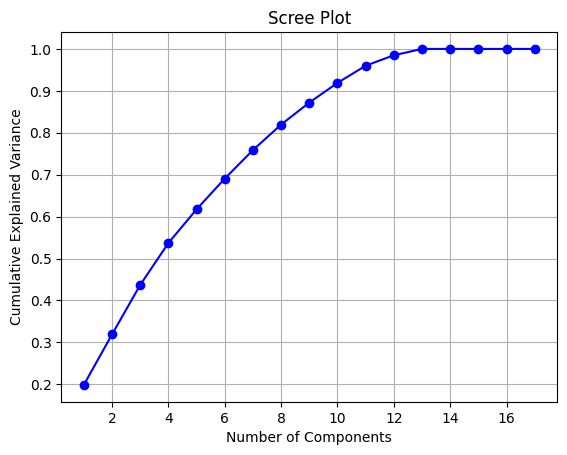

In [127]:
# Step 1: Data Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train_processed)

# Step 2: Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Scree plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting the scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

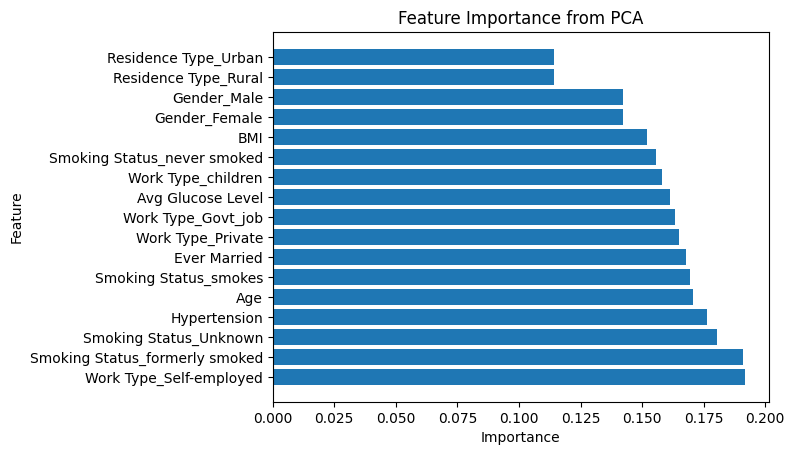

In [128]:
# Step 4: Plot feature importance
# Sort the feature_importance array and the X_test_processed_df.columns array by descending order
explained_variance_ratio = pca.explained_variance_ratio_
loadings = pca.components_
feature_importance = np.abs(loadings) * explained_variance_ratio[:, np.newaxis]
feature_importance = np.sum(feature_importance, axis=0)

order = np.argsort(feature_importance)[::-1] # get the order of indices by sorting feature_importance
sorted_feature_importance = feature_importance[order] # sort feature_importance by order
sorted_feature_names = X_train_processed_df.columns[order] # sort X_test_processed_df.columns by order

plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance) # use sorted_feature_importance
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title('Feature Importance from PCA')
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names) # use sorted_feature_names
plt.show()

- This shows BMI had the least importance while Formerly Smoked had the highest importance level.

In [129]:
pca= PCA(n_components=10)

In [130]:
#Create a Transformer Pipeline
transformer = make_pipeline(StandardScaler(), pca)

#KNN Model

## KNN with PCA

In [131]:
# Create an instance of the model
knn = KNeighborsClassifier()
# Create a model pipeline
knn_pipe_pca = make_pipeline(preprocessor, transformer, knn)
## Fit the model
knn_pipe_pca.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4db10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4d720>)],
                                   verbose_feature_names_out=False)),
                ('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=10))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [132]:
%%time
# get predictions for train
preds_pca_train = knn_pipe_pca.predict(X_train)
# get prediction for test
preds_pca_test = knn_pipe_pca.predict(X_test)

print('PCA KNN Training accuracy:', knn_pipe_pca.score(X_train, y_train))
print('PCA KNN Testing accuracy:', knn_pipe_pca.score(X_test, y_test))
print('Train\n', classification_report(y_train, preds_pca_train,target_names=labels))
print('Test\n', classification_report(y_test, preds_pca_test, target_names=labels))

PCA KNN Training accuracy: 0.9504287245444801
PCA KNN Testing accuracy: 0.946987951807229
Train
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      3547
      Stroke       0.50      0.04      0.08       185

    accuracy                           0.95      3732
   macro avg       0.73      0.52      0.53      3732
weighted avg       0.93      0.95      0.93      3732

Test
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1183
      Stroke       0.00      0.00      0.00        62

    accuracy                           0.95      1245
   macro avg       0.48      0.50      0.49      1245
weighted avg       0.90      0.95      0.92      1245

CPU times: user 558 ms, sys: 213 ms, total: 771 ms
Wall time: 575 ms


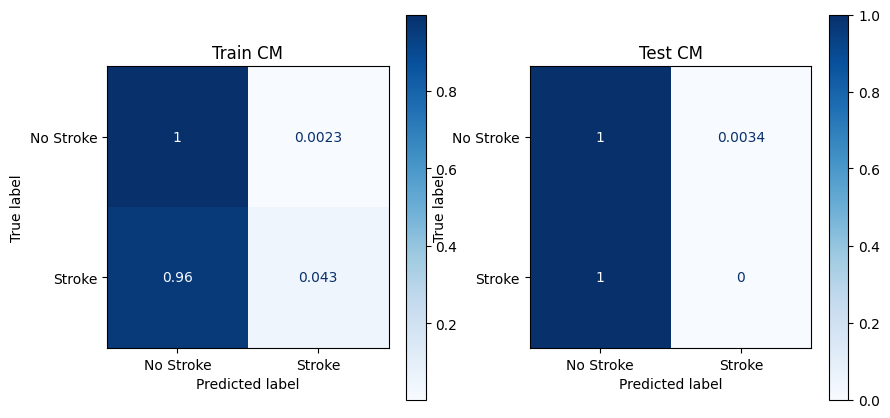

In [133]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

ConfusionMatrixDisplay.from_predictions(y_train, preds_pca_train,
                                        ax=axes[0], cmap='Blues', normalize='true', display_labels=labels)
axes[0].set_title('Train CM')

ConfusionMatrixDisplay.from_predictions(y_test, preds_pca_test,
                                        ax=axes[1], cmap='Blues', normalize='true', display_labels=labels)
axes[1].set_title('Test CM');

##KNN Model without PCA

In [134]:
# Create an instance of the model
knn = KNeighborsClassifier()
# Create a model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
## Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4db10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4d720>)],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [135]:
%%time
# Generate training predictions
knn_train_preds = knn_pipe.predict(X_train)
# Generate test predictions
knn_test_preds = knn_pipe.predict(X_test)

print('NO PCA KNN Training accuracy:', knn_pipe.score(X_train, y_train))
print('NO PCA KNN Testing accuracy:', knn_pipe.score(X_test, y_test))
print('Train\n', classification_report(y_train, knn_train_preds,target_names=labels))
print('Test\n', classification_report(y_test, knn_test_preds, target_names=labels))

NO PCA KNN Training accuracy: 0.9520364415862809
NO PCA KNN Testing accuracy: 0.9461847389558233
Train
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.98      3547
      Stroke       0.64      0.08      0.14       185

    accuracy                           0.95      3732
   macro avg       0.80      0.54      0.56      3732
weighted avg       0.94      0.95      0.93      3732

Test
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1183
      Stroke       0.00      0.00      0.00        62

    accuracy                           0.95      1245
   macro avg       0.47      0.50      0.49      1245
weighted avg       0.90      0.95      0.92      1245

CPU times: user 1.23 s, sys: 8.7 ms, total: 1.24 s
Wall time: 1.19 s


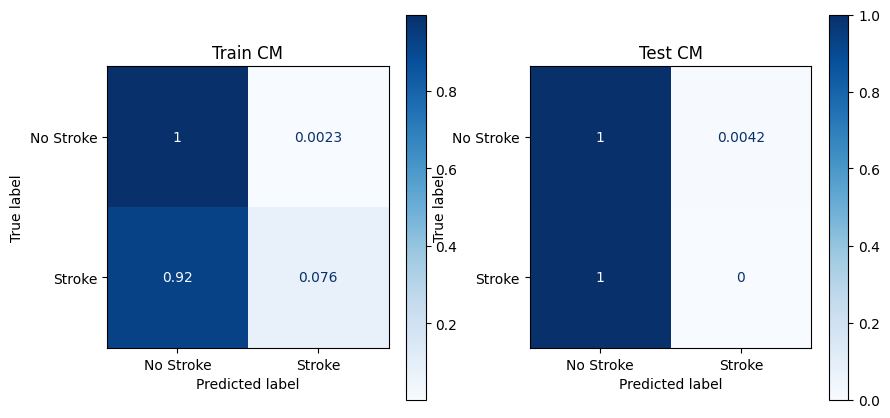

In [136]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

ConfusionMatrixDisplay.from_predictions(y_train, knn_train_preds,
                                        ax=axes[0], cmap='Blues', normalize='true', display_labels=labels)
axes[0].set_title('Train CM')

ConfusionMatrixDisplay.from_predictions(y_test, knn_test_preds,
                                        ax=axes[1], cmap='Blues', normalize='true', display_labels=labels)
axes[1].set_title('Test CM');

## Knn Tuned

In [137]:
# Display the hyperparameters
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4db10>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4d720>)],
                     verbose_feature_names_out=False)),
  ('kneighborsclassifier', KNeighborsClassifier())]

In [138]:
# Create a dictionary of parameters

params = {'kneighborsclassifier__n_neighbors': range(1,15),
          'kneighborsclassifier__weights': ['distance','uniform']}

In [139]:
# Tune hyperparameters with GridSearchCV
knn_gs = GridSearchCV(knn_pipe, params)
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4db10>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4d720>)],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 15),
                         'kneighborsclassifier__weights': ['distance',
                                                           'uniform']})

In [140]:
knn_gs.best_params_

{'kneighborsclassifier__n_neighbors': 6,
 'kneighborsclassifier__weights': 'uniform'}

In [141]:
knn_gs.best_score_

0.9506967997100106

In [142]:
best_knn = knn_gs.best_estimator_

In [143]:
best_knn

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5e441f0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5e47cd0>)],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=6))])

In [144]:
# Instantiate and fit GridSearchCV
train_preds = best_knn.predict(X_train)
test_preds = best_knn.predict(X_test)

In [145]:
print(f"GridSearch Tuned Train Accuracy Score is {best_knn.score(X_train, y_train)}\n")
print(f" GridSearch Tuned Test Accuracy Score is {best_knn.score(X_test, y_test)}\n")

print('Train\n', classification_report(y_train, train_preds, target_names=labels))
print('Test\n', classification_report(y_test, test_preds, target_names=labels))

GridSearch Tuned Train Accuracy Score is 0.9517684887459807

 GridSearch Tuned Test Accuracy Score is 0.9477911646586346

Train
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.98      3547
      Stroke       0.78      0.04      0.07       185

    accuracy                           0.95      3732
   macro avg       0.86      0.52      0.52      3732
weighted avg       0.94      0.95      0.93      3732

Test
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1183
      Stroke       0.00      0.00      0.00        62

    accuracy                           0.95      1245
   macro avg       0.48      0.50      0.49      1245
weighted avg       0.90      0.95      0.92      1245



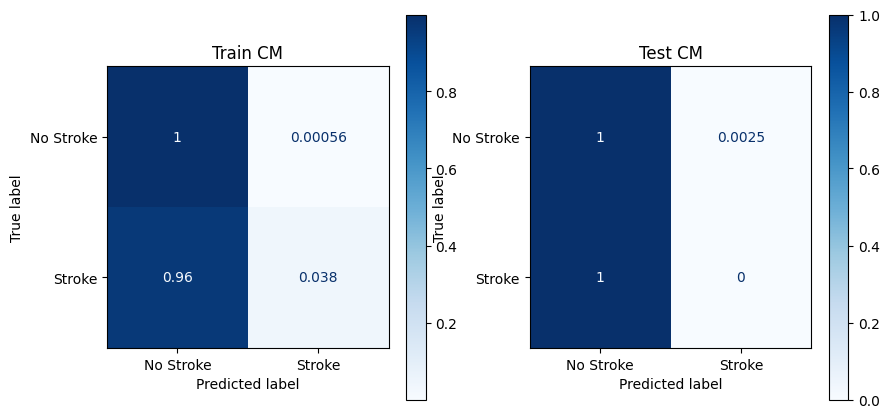

In [146]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        ax=axes[1], cmap='Blues',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

- False Positives decreased and False Negatives stayed the same when comparing the default model to the tuned model.  This Gridsearch model had lower False Positive than the KNN PCA model.  KNN GridSearch appears to be the Best KNN Model.

## Under Sampling KNN

In [147]:
under_sampler = RandomUnderSampler()
knn = KNeighborsClassifier()
under_knn_pipe = make_sampler_pipeline(preprocessor, under_sampler, knn)
#Fit and evaluate the model pipeline
under_knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4db10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4d720>)],
                                   verbose_feature_names_out=False)),
                ('randomundersampler', RandomUnderSampler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [148]:
# get predictions for train
preds_undersample_train = under_knn_pipe.predict(X_train)
# get prediction for test
preds_undersample_test = under_knn_pipe.predict(X_test)

print('Under Sample KNN Training accuracy:', under_knn_pipe.score(X_train, y_train))
print('Under Sample KNN Testing accuracy:', under_knn_pipe.score(X_test, y_test))
print('Train\n', classification_report(y_train, preds_undersample_train,target_names=labels))
print('Test\n', classification_report(y_test, preds_undersample_test, target_names=labels))

Under Sample KNN Training accuracy: 0.6881028938906752
Under Sample KNN Testing accuracy: 0.6698795180722892
Train
               precision    recall  f1-score   support

   No Stroke       0.99      0.68      0.81      3547
      Stroke       0.12      0.84      0.21       185

    accuracy                           0.69      3732
   macro avg       0.55      0.76      0.51      3732
weighted avg       0.95      0.69      0.78      3732

Test
               precision    recall  f1-score   support

   No Stroke       0.98      0.66      0.79      1183
      Stroke       0.11      0.77      0.19        62

    accuracy                           0.67      1245
   macro avg       0.55      0.72      0.49      1245
weighted avg       0.94      0.67      0.76      1245



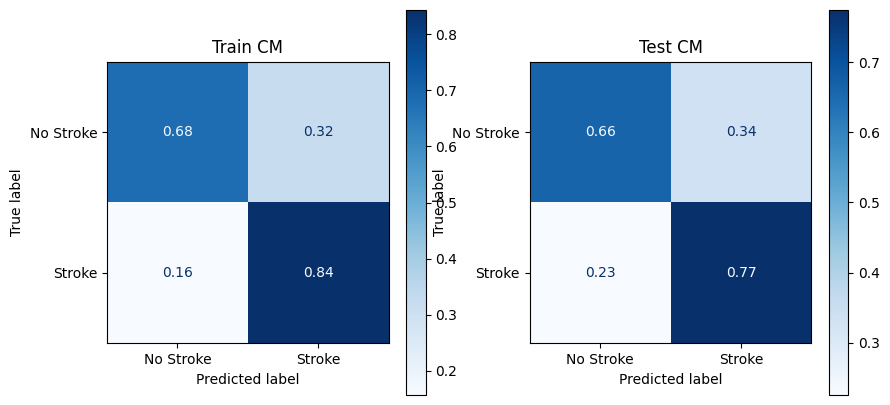

In [149]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, preds_undersample_train,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, preds_undersample_test,
                                        ax=axes[1], cmap='Blues',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

## Tuned Under Sampling KNN

In [150]:
under_knn_pipe_gs = GridSearchCV(under_knn_pipe, params)

under_knn_pipe_gs.fit(X_train, y_train)
print('Best KNN Parameters:')
print(under_knn_pipe_gs.best_params_)
best_under_knn_pipe = under_knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_under_knn_pipe.score(X_test, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 2, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of best KNN model is: 0.8144578313253013


In [151]:
tuned_under_knn = KNeighborsClassifier(n_neighbors=2, weights='uniform')
tuned_under_knn_pipe = make_sampler_pipeline(preprocessor, under_sampler, tuned_under_knn)
#Fit and evaluate the model pipeline
tuned_under_knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4db10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4d720>)],
                                   verbose_feature_names_out=False)),
                ('randomundersampler', RandomUnderSampler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])

In [152]:
# get predictions for train
preds_undersample_train = tuned_under_knn_pipe.predict(X_train)
# get prediction for test
preds_undersample_test = tuned_under_knn_pipe.predict(X_test)

print('Tuned Under Sample KNN Training accuracy:', tuned_under_knn_pipe.score(X_train, y_train))
print('Tuned Under Sample KNN Testing accuracy:', tuned_under_knn_pipe.score(X_test, y_test))
print('Train\n', classification_report(y_train, preds_undersample_train,target_names=labels))
print('Test\n', classification_report(y_test, preds_undersample_test, target_names=labels))

Tuned Under Sample KNN Training accuracy: 0.8239549839228296
Tuned Under Sample KNN Testing accuracy: 0.8128514056224899
Train
               precision    recall  f1-score   support

   No Stroke       0.98      0.84      0.90      3547
      Stroke       0.16      0.61      0.25       185

    accuracy                           0.82      3732
   macro avg       0.57      0.72      0.58      3732
weighted avg       0.94      0.82      0.87      3732

Test
               precision    recall  f1-score   support

   No Stroke       0.96      0.84      0.89      1183
      Stroke       0.11      0.39      0.17        62

    accuracy                           0.81      1245
   macro avg       0.54      0.61      0.53      1245
weighted avg       0.92      0.81      0.86      1245



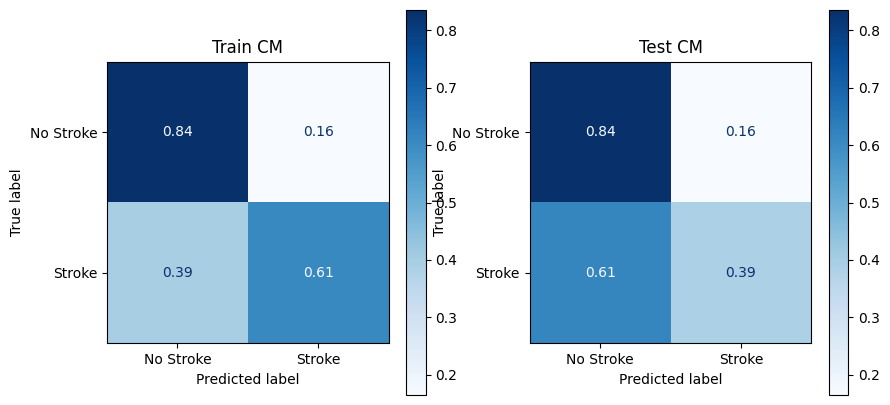

In [153]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, preds_undersample_train,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, preds_undersample_test,
                                        ax=axes[1], cmap='Blues',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

#Random Forest Classifier

## Random Forest with PCA

In [154]:
# Create an instance of the model
random_forest = RandomForestClassifier(random_state=42)
# Create a model pipeline
rf_pipe_pca = make_pipeline(preprocessor, transformer, random_forest )
## Fit the model
rf_pipe_pca.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4db10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4d720>)],
                                   verbose_feature_names_out=False)),
                ('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=10))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [155]:
%%time
# get predictions for train
preds_pca_train = rf_pipe_pca.predict(X_train)
# get prediction for test
preds_pca_test = rf_pipe_pca.predict(X_test)

print('PCA Random Forest Training accuracy:', rf_pipe_pca.score(X_train, y_train))
print('PCA Random Forest Testing accuracy:', rf_pipe_pca.score(X_test, y_test))
print('Train\n', classification_report(y_train, preds_pca_train,target_names=labels))
print('Test\n', classification_report(y_test, preds_pca_test, target_names=labels))

PCA Random Forest Training accuracy: 1.0
PCA Random Forest Testing accuracy: 0.9477911646586346
Train
               precision    recall  f1-score   support

   No Stroke       1.00      1.00      1.00      3547
      Stroke       1.00      1.00      1.00       185

    accuracy                           1.00      3732
   macro avg       1.00      1.00      1.00      3732
weighted avg       1.00      1.00      1.00      3732

Test
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1183
      Stroke       0.00      0.00      0.00        62

    accuracy                           0.95      1245
   macro avg       0.48      0.50      0.49      1245
weighted avg       0.90      0.95      0.92      1245

CPU times: user 316 ms, sys: 93.3 ms, total: 409 ms
Wall time: 395 ms


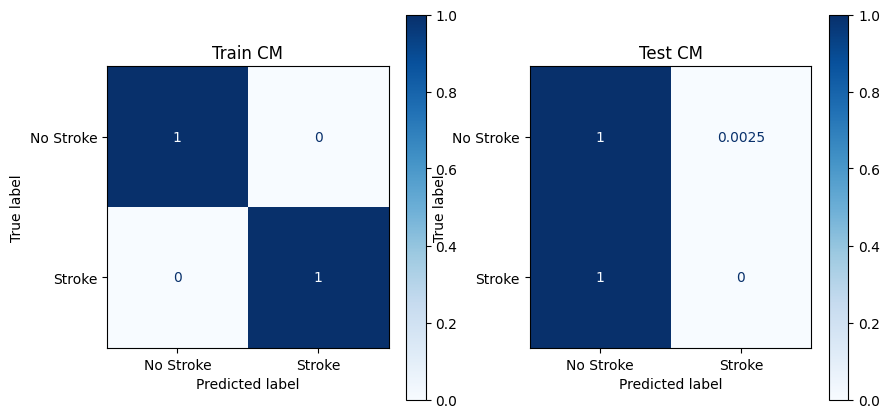

In [156]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, preds_pca_train,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, preds_pca_test,
                                        ax=axes[1], cmap='Blues',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

## Random Forest without PCA

In [157]:
# Create an instance of the model
random_forest = RandomForestClassifier(random_state=42)

# Create the pipeline
rf_pipe = make_pipeline(preprocessor, random_forest)

# Fit on training data
rf_pipe.fit(X_train, y_train)

# Make predictions
rf_test_preds = rf_pipe.predict(X_test)
rf_train_preds= rf_pipe.predict(X_train)

In [158]:
print(f"Default Train Accuracy Score is {rf_pipe.score(X_train, y_train)}\n")
print(f"Default Test Accuracy Score is {rf_pipe.score(X_test, y_test)}\n")

print('Train Report')
print(classification_report(y_train, rf_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, rf_test_preds, target_names=labels))

Default Train Accuracy Score is 1.0

Default Test Accuracy Score is 0.946987951807229

Train Report
              precision    recall  f1-score   support

   No Stroke       1.00      1.00      1.00      3547
      Stroke       1.00      1.00      1.00       185

    accuracy                           1.00      3732
   macro avg       1.00      1.00      1.00      3732
weighted avg       1.00      1.00      1.00      3732

Test Report
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1183
      Stroke       0.00      0.00      0.00        62

    accuracy                           0.95      1245
   macro avg       0.48      0.50      0.49      1245
weighted avg       0.90      0.95      0.92      1245



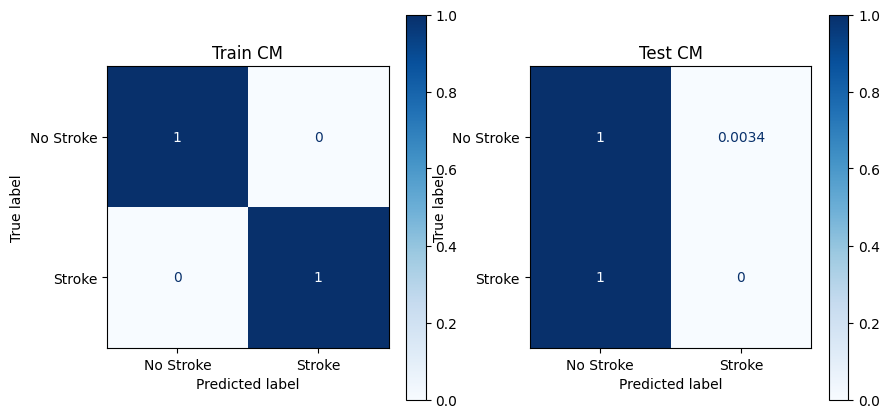

In [159]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, rf_train_preds,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, rf_test_preds,
                                        ax=axes[1], cmap='Blues',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

## Random Forest Tuned

In [160]:
#Get parameters
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4db10>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4d720>)],
                     verbose_feature_names_out=False)),
  ('randomforestclassifier', RandomForestClassifier

In [161]:
params = {'randomforestclassifier__class_weight': [None, 'balanced', 'balanced_subsample'],
            'randomforestclassifier__max_depth': [1, 5, 10, 15],
            'randomforestclassifier__n_estimators': [10, 30, 50, 100],
            'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss']}

In [162]:
rf_gs= GridSearchCV(rf_pipe, params)
rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4db10>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          One...
                                                          verbose_feature_names_out=False)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__class_weight': [None,
                                                                  'balanced',
                                                                  'balanced_subsample'],
                         'randomforestclassifier__criterion': ['gini',
                                                               'entropy',
                                                               'log_loss'],
                         'randomforestclassifier__max_depth': [1, 5, 10, 15],
                         'randomforestclassifier__n_estimators': [10, 30, 50,
                                                                  100]})

In [163]:
#Display the parameters of the model
rf_gs.best_params_

{'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': 1,
 'randomforestclassifier__n_estimators': 10}

In [164]:
rf_gs.best_score_

0.9504287031952654

In [165]:
best_rf= rf_gs.best_estimator_

In [166]:
train_preds= best_rf.predict(X_train)
test_preds= best_rf.predict(X_test)

In [167]:
print(f"Tuned Random Forest Train Accuracy Score is {best_rf.score(X_train, y_train)}\n")
print(f"Tuned Random Forest Test Accuracy Score is {best_rf.score(X_test, y_test)}\n")

print('Train\n', classification_report(y_train, train_preds))
print('Test\n', classification_report(y_test, test_preds))

Tuned Random Forest Train Accuracy Score is 0.9504287245444801

Tuned Random Forest Test Accuracy Score is 0.9502008032128514

Train
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3547
           1       0.00      0.00      0.00       185

    accuracy                           0.95      3732
   macro avg       0.48      0.50      0.49      3732
weighted avg       0.90      0.95      0.93      3732

Test
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1183
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1245
   macro avg       0.48      0.50      0.49      1245
weighted avg       0.90      0.95      0.93      1245



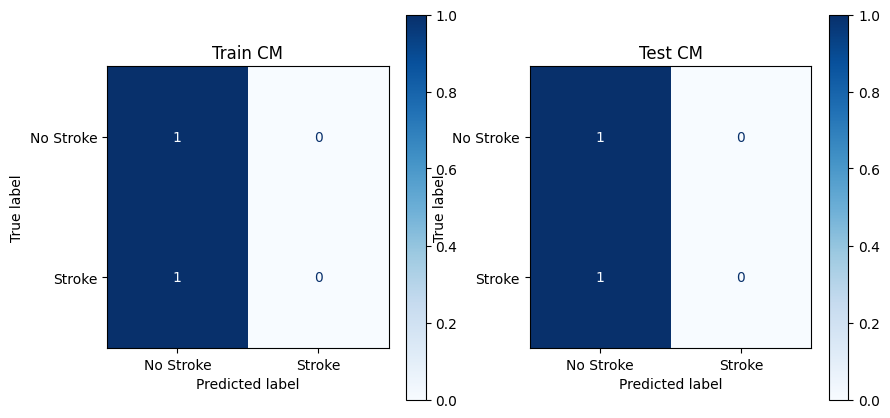

In [168]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        ax=axes[1], cmap='Blues',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

## Under Sampling Random Forest

In [169]:
under_sampler = RandomUnderSampler()

under_rf_pipe = make_sampler_pipeline(preprocessor, under_sampler, random_forest)
under_rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4db10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4d720>)],
                                   verbose_feature_names_out=False)),
                ('randomundersampler', RandomUnderSampler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [170]:
# get predictions for train
preds_undersample_train = under_rf_pipe.predict(X_train)
# get prediction for test
preds_undersample_test = under_rf_pipe.predict(X_test)

print('Under Sample RF Training accuracy:', under_rf_pipe.score(X_train, y_train))
print('Under Sample RF Testing accuracy:', under_rf_pipe.score(X_test, y_test))
print('Train\n', classification_report(y_train, preds_undersample_train,target_names=labels))
print('Test\n', classification_report(y_test, preds_undersample_test, target_names=labels))

Under Sample RF Training accuracy: 0.7060557341907824
Under Sample RF Testing accuracy: 0.6875502008032128
Train
               precision    recall  f1-score   support

   No Stroke       1.00      0.69      0.82      3547
      Stroke       0.14      1.00      0.25       185

    accuracy                           0.71      3732
   macro avg       0.57      0.85      0.53      3732
weighted avg       0.96      0.71      0.79      3732

Test
               precision    recall  f1-score   support

   No Stroke       0.99      0.68      0.81      1183
      Stroke       0.12      0.82      0.21        62

    accuracy                           0.69      1245
   macro avg       0.55      0.75      0.51      1245
weighted avg       0.94      0.69      0.78      1245



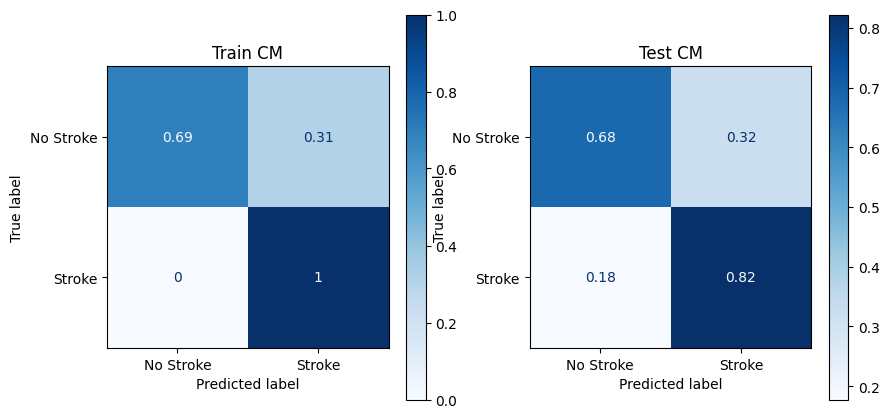

In [171]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, preds_undersample_train,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, preds_undersample_test,
                                        ax=axes[1], cmap='Blues',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

##Tuned Under Sampling Random Forest

In [172]:
under_rf_pipe_gs = GridSearchCV(under_rf_pipe, params)

under_rf_pipe_gs.fit(X_train, y_train)
print('Best Random Forest Parameters:')
print(under_rf_pipe_gs.best_params_)
best_under_rf_pipe = under_rf_pipe_gs.best_estimator_
print(f'Accuracy: {best_under_rf_pipe.score(X_test, y_test)}')

Best Random Forest Parameters:
{'randomforestclassifier__class_weight': 'balanced_subsample', 'randomforestclassifier__criterion': 'log_loss', 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__n_estimators': 10}
Accuracy: 0.7558232931726908


In [173]:
tuned_under_rf = RandomForestClassifier(class_weight= 'balanced_subsample', n_estimators= 10, criterion='log_loss',
                                        max_depth=15, random_state=42)

tuned_under_rf_pipe = make_sampler_pipeline(preprocessor, under_sampler, tuned_under_rf)
tuned_under_rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4db10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4d720>)],
                                   verbose_feature_names_out=False)),
                ('randomundersampler', RandomUnderSampler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        criterion='log_loss', max_depth=15,
                                        n_estimators=10, random_state=42))])

In [174]:
# get predictions for train
preds_undersample_train = tuned_under_rf_pipe.predict(X_train)
# get prediction for test
preds_undersample_test = tuned_under_rf_pipe.predict(X_test)

print('Tuned Under Sample RF Training accuracy:', tuned_under_rf_pipe.score(X_train, y_train))
print('Tuned Under Sample RF Testing accuracy:', tuned_under_rf_pipe.score(X_test, y_test))
print('Train\n', classification_report(y_train, preds_undersample_train,target_names=labels))
print('Test\n', classification_report(y_test, preds_undersample_test, target_names=labels))

Tuned Under Sample RF Training accuracy: 0.7633976420150054
Tuned Under Sample RF Testing accuracy: 0.7397590361445783
Train
               precision    recall  f1-score   support

   No Stroke       1.00      0.75      0.86      3547
      Stroke       0.17      0.98      0.29       185

    accuracy                           0.76      3732
   macro avg       0.58      0.87      0.57      3732
weighted avg       0.96      0.76      0.83      3732

Test
               precision    recall  f1-score   support

   No Stroke       0.98      0.74      0.84      1183
      Stroke       0.12      0.68      0.21        62

    accuracy                           0.74      1245
   macro avg       0.55      0.71      0.53      1245
weighted avg       0.94      0.74      0.81      1245



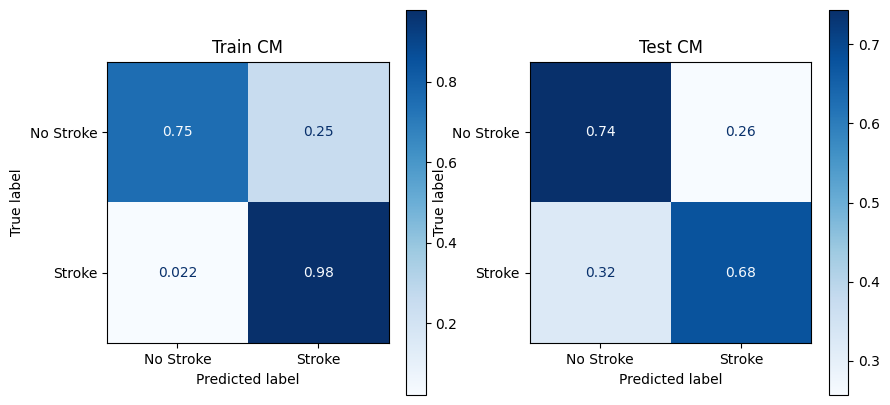

In [175]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, preds_undersample_train,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, preds_undersample_test,
                                        ax=axes[1], cmap='Blues',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

# Logistic Regression Model

## Logistic Regression with PCA

In [176]:
# Create an instance of the model
logreg_pca= LogisticRegression(random_state=42)
# Create a model pipeline
logreg_pipe_pca = make_pipeline(preprocessor, transformer, logreg_pca )
## Fit the model
logreg_pipe_pca.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4db10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4d720>)],
                                   verbose_feature_names_out=False)),
                ('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=10))])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [177]:
%%time
# get predictions for train
logreg_preds_pca_train = logreg_pipe_pca.predict(X_train)
# get prediction for test
logreg_preds_pca_test = logreg_pipe_pca.predict(X_test)

print('PCA Logistic Regression Training accuracy:', logreg_pipe_pca.score(X_train, y_train))
print('PCA Logistic Regression Testing accuracy:', logreg_pipe_pca.score(X_test, y_test))
print('Train\n', classification_report(y_train, logreg_preds_pca_train,target_names=labels))
print('Test\n', classification_report(y_test, logreg_preds_pca_test, target_names=labels))

PCA Logistic Regression Training accuracy: 0.9504287245444801
PCA Logistic Regression Testing accuracy: 0.9502008032128514
Train
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      3547
      Stroke       0.00      0.00      0.00       185

    accuracy                           0.95      3732
   macro avg       0.48      0.50      0.49      3732
weighted avg       0.90      0.95      0.93      3732

Test
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1183
      Stroke       0.00      0.00      0.00        62

    accuracy                           0.95      1245
   macro avg       0.48      0.50      0.49      1245
weighted avg       0.90      0.95      0.93      1245

CPU times: user 83.4 ms, sys: 76.9 ms, total: 160 ms
Wall time: 100 ms


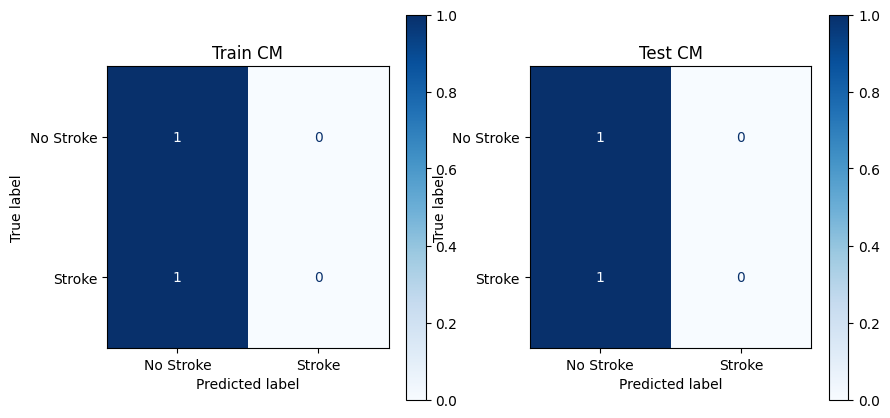

In [178]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, logreg_preds_pca_train,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, logreg_preds_pca_test,
                                        ax=axes[1], cmap='Blues',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

## Logistic Regression without PCA

In [179]:
#create an instance of the model
logreg= LogisticRegression(random_state=42)
#create the pipeline
log_reg_pipe = make_pipeline(preprocessor, logreg)
#Fit on training data
log_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4db10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4d720>)],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(random_state=42))])

In [180]:
#make predictions
logreg_test_preds = log_reg_pipe.predict(X_test)
logreg_train_preds = log_reg_pipe.predict(X_train)

print(f"Default Train Accuracy Score is {log_reg_pipe.score(X_train, y_train)}")
print(f"Default Test Accuracy Score is {log_reg_pipe.score(X_test, y_test)}")

Default Train Accuracy Score is 0.9506966773847803
Default Test Accuracy Score is 0.9502008032128514


In [181]:
## print the classification reports

print('Train Report')
print(classification_report(y_train, logreg_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, logreg_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      3547
      Stroke       1.00      0.01      0.01       185

    accuracy                           0.95      3732
   macro avg       0.98      0.50      0.49      3732
weighted avg       0.95      0.95      0.93      3732

Test Report
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1183
      Stroke       0.00      0.00      0.00        62

    accuracy                           0.95      1245
   macro avg       0.48      0.50      0.49      1245
weighted avg       0.90      0.95      0.93      1245



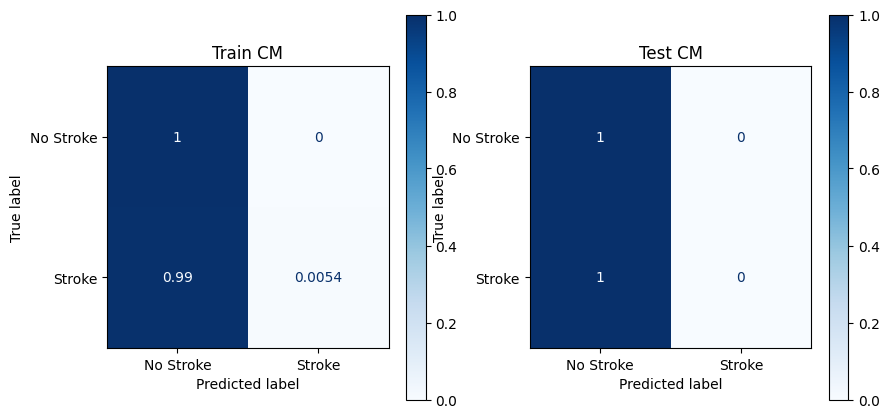

In [182]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, logreg_train_preds,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, logreg_test_preds,
                                        ax=axes[1], cmap='Blues',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

- PCA and no PCA appear to have the same resultss

##Logistic Regression Tuned

In [183]:
#Display the parameters of the model
model = LogisticRegression()
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [184]:
# Create the logistic regression model
logreg_gs = LogisticRegression(random_state=42, solver='liblinear')

# Define the parameter grid
param_grid = {
    'logisticregression__C': [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__class_weight': ['balanced']}

# Create the pipeline
pipeline = make_pipeline(preprocessor,logreg_gs)

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid)

# Fit the data to perform the hyperparameter tuning
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
train_preds= best_model.predict(X_train)
test_preds= best_model.predict(X_test)

Best Hyperparameters:  {'logisticregression__C': 0.0001, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1'}


In [185]:
print(f"Tuned Train Accuracy Score is {best_model.score(X_train, y_train)}\n")
print(f"Tuned Test Accuracy Score is {best_model.score(X_test, y_test)}\n")

print('Train\n', classification_report(y_train, train_preds))
print('Test\n', classification_report(y_test, test_preds))

Tuned Train Accuracy Score is 0.9504287245444801

Tuned Test Accuracy Score is 0.9502008032128514

Train
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3547
           1       0.00      0.00      0.00       185

    accuracy                           0.95      3732
   macro avg       0.48      0.50      0.49      3732
weighted avg       0.90      0.95      0.93      3732

Test
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1183
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1245
   macro avg       0.48      0.50      0.49      1245
weighted avg       0.90      0.95      0.93      1245



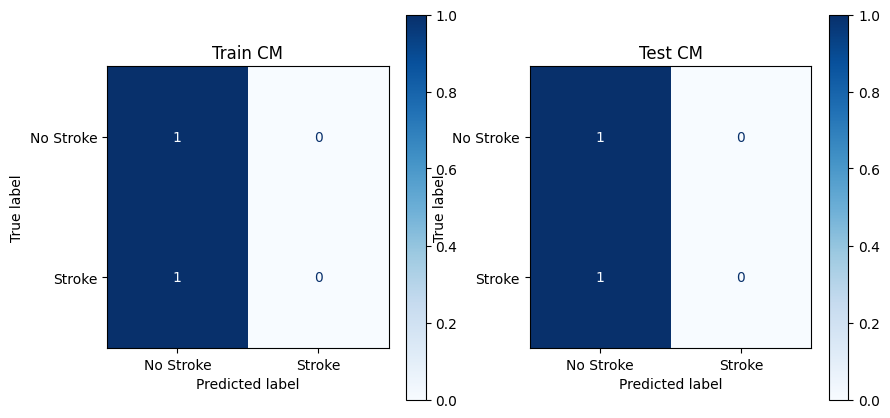

In [186]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        ax=axes[1], cmap='Blues',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

## Under Sampling Logistic Regression

In [187]:
under_sampler = RandomUnderSampler()

under_logreg_pipe = make_sampler_pipeline(preprocessor, under_sampler, logreg)
under_logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4db10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4d720>)],
                                   verbose_feature_names_out=False)),
                ('randomundersampler', RandomUnderSampler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [188]:
# get predictions for train
preds_undersample_train = under_logreg_pipe.predict(X_train)
# get prediction for test
preds_undersample_test = under_logreg_pipe.predict(X_test)

print('Under Sample LOG REG Training accuracy:', under_logreg_pipe.score(X_train, y_train))
print('Under Sample LOG REG Testing accuracy:', under_logreg_pipe.score(X_test, y_test))
print('Train\n', classification_report(y_train, preds_undersample_train,target_names=labels))
print('Test\n', classification_report(y_test, preds_undersample_test, target_names=labels))

Under Sample LOG REG Training accuracy: 0.7441050375133976
Under Sample LOG REG Testing accuracy: 0.7365461847389558
Train
               precision    recall  f1-score   support

   No Stroke       0.99      0.74      0.85      3547
      Stroke       0.14      0.79      0.24       185

    accuracy                           0.74      3732
   macro avg       0.56      0.77      0.54      3732
weighted avg       0.94      0.74      0.82      3732

Test
               precision    recall  f1-score   support

   No Stroke       0.99      0.73      0.84      1183
      Stroke       0.13      0.79      0.23        62

    accuracy                           0.74      1245
   macro avg       0.56      0.76      0.54      1245
weighted avg       0.94      0.74      0.81      1245



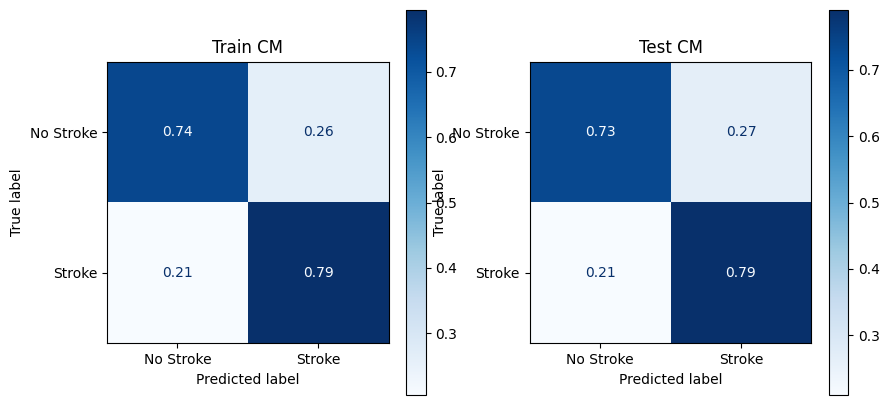

In [189]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, preds_undersample_train,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, preds_undersample_test,
                                        ax=axes[1], cmap='Blues',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

## Tuned Under Sampling Logistic Regression

In [190]:
under_logreg_pipe_gs = GridSearchCV(under_rf_pipe, params)

under_logreg_pipe_gs.fit(X_train, y_train)
print('Tuned Logistic Regression Parameters:')
print(under_logreg_pipe_gs.best_params_)
best_under_logreg_pipe = under_logreg_pipe_gs.best_estimator_
print(f'Accuracy of Tuned Logistic Regression model is: {best_under_logreg_pipe.score(X_test, y_test)}')

Tuned Logistic Regression Parameters:
{'randomforestclassifier__class_weight': None, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__n_estimators': 10}
Accuracy of Tuned Logistic Regression model is: 0.7413654618473896


In [191]:
tuned_under_logreg = RandomForestClassifier(class_weight= 'balanced', n_estimators= 10, criterion='log_loss',
                                        max_depth=15, random_state=42)

tuned_under_logreg_pipe = make_sampler_pipeline(preprocessor, under_sampler, tuned_under_logreg)
tuned_under_logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4db10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4d720>)],
                                   verbose_feature_names_out=False)),
                ('randomundersampler', RandomUnderSampler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='log_loss', max_depth=15,
                                        n_estimators=10, random_state=42))])

In [192]:
# get predictions for train
preds_undersample_train = tuned_under_logreg_pipe.predict(X_train)
# get prediction for test
preds_undersample_test = tuned_under_logreg_pipe.predict(X_test)

print('Tuned Under Sample Logistic Regression Training accuracy:', tuned_under_logreg_pipe.score(X_train, y_train))
print('Tuned Under Sample Logistic Regression Testing accuracy:', tuned_under_logreg_pipe.score(X_test, y_test))
print('Train\n', classification_report(y_train, preds_undersample_train,target_names=labels))
print('Test\n', classification_report(y_test, preds_undersample_test, target_names=labels))

Tuned Under Sample Logistic Regression Training accuracy: 0.7489281886387996
Tuned Under Sample Logistic Regression Testing accuracy: 0.7253012048192771
Train
               precision    recall  f1-score   support

   No Stroke       1.00      0.74      0.85      3547
      Stroke       0.16      0.99      0.28       185

    accuracy                           0.75      3732
   macro avg       0.58      0.86      0.56      3732
weighted avg       0.96      0.75      0.82      3732

Test
               precision    recall  f1-score   support

   No Stroke       0.98      0.73      0.83      1183
      Stroke       0.12      0.73      0.21        62

    accuracy                           0.73      1245
   macro avg       0.55      0.73      0.52      1245
weighted avg       0.94      0.73      0.80      1245



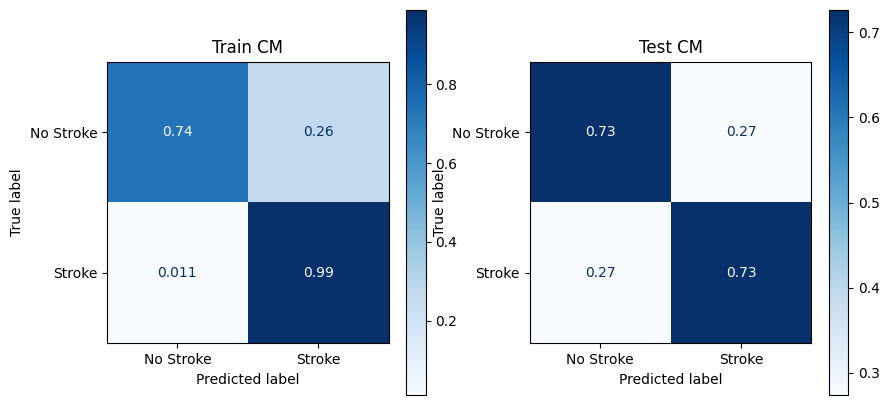

In [193]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, preds_undersample_train,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, preds_undersample_test,
                                        ax=axes[1], cmap='Blues',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

# Feature Engineering

- I will create an age bin with three categories.
    - young age
    - middle age
    - old age

In [194]:
df2 = df.copy()
df2.head()

,Gender,Age,Hypertension,Ever Married,Work Type,Residence Type,Avg Glucose Level,BMI,Smoking Status,Stroke
0,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,1,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,1,Self-employed,Rural,174.12,24.0,never smoked,1


In [195]:
df2.columns

Index(['Gender', 'Age', 'Hypertension', 'Ever Married', 'Work Type',
       'Residence Type', 'Avg Glucose Level', 'BMI', 'Smoking Status',
       'Stroke'],
      dtype='object')

In [196]:
age_bins = [0, 25, 44, float('inf')]
age_labels = ['young_age', 'middle_age', 'old_age']
df2['age_group'] = pd.cut(df2['Age'], bins=age_bins, labels=age_labels, right=False)

In [197]:
print(df2['age_group'].value_counts())

old_age       2592
young_age     1205
middle_age    1180
Name: age_group, dtype: int64


- I will create bmi bin as well with 4 categories.
    - Underweight
    - Normal
    - Overweight
    - Obese

In [198]:
bmi_bins = [0, 18.5, 25, 30, float('inf')]
bmi_labels = ['underweight', 'normal', 'overweight', 'obese']
df2['bmi_category'] = pd.cut(df2['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

In [199]:
print(df2['bmi_category'].value_counts())

obese          1805
overweight     1404
normal         1232
underweight     335
Name: bmi_category, dtype: int64


- Lets Remove 'age' and 'bmi' columns now

In [200]:
df2.drop(['Age', 'BMI'], axis=1, inplace=True)

In [201]:
#Encode these as numerical values
df2 = pd.get_dummies(df2, columns=['bmi_category', 'age_group'])


In [202]:
df2['bmi_category_normal'].value_counts()

0    3745
1    1232
Name: bmi_category_normal, dtype: int64

In [203]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4977 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    4977 non-null   object 
 1   Hypertension              4977 non-null   int64  
 2   Ever Married              4977 non-null   int64  
 3   Work Type                 4977 non-null   object 
 4   Residence Type            4977 non-null   object 
 5   Avg Glucose Level         4977 non-null   float64
 6   Smoking Status            4977 non-null   object 
 7   Stroke                    4977 non-null   int64  
 8   bmi_category_underweight  4977 non-null   uint8  
 9   bmi_category_normal       4977 non-null   uint8  
 10  bmi_category_overweight   4977 non-null   uint8  
 11  bmi_category_obese        4977 non-null   uint8  
 12  age_group_young_age       4977 non-null   uint8  
 13  age_group_middle_age      4977 non-null   uint8  
 14  age_grou

## Feature Engineering with Best KNN

In [204]:
X2 = df2.drop(columns=['Stroke'])
y2 = df2['Stroke']

X2_train, X2_test, y2_train, y2_test =  train_test_split(X2, y2, stratify=y, random_state=42)

In [205]:
processed_df2 = preprocessor.fit_transform(X2)
processed_df2.shape

(4977, 22)

In [206]:
under_sampler = RandomUnderSampler()
knn = KNeighborsClassifier()
under_knn_pipe = make_sampler_pipeline(preprocessor, under_sampler, knn)
#Fit and evaluate the model pipeline
under_knn_pipe.fit(X2_train, y2_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4db10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4d720>)],
                                   verbose_feature_names_out=False)),
                ('randomundersampler', RandomUnderSampler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [207]:
# get predictions for train
preds_undersample_train = under_knn_pipe.predict(X2_train)
# get prediction for test
preds_undersample_test = under_knn_pipe.predict(X2_test)

print('Under Sample KNN Training accuracy:', under_knn_pipe.score(X2_train, y2_train))
print('Under Sample KNN Testing accuracy:', under_knn_pipe.score(X2_test, y2_test))
print('Train\n', classification_report(y2_train, preds_undersample_train,target_names=labels))
print('Test\n', classification_report(y2_test, preds_undersample_test, target_names=labels))

Under Sample KNN Training accuracy: 0.6720257234726688
Under Sample KNN Testing accuracy: 0.6634538152610442
Train
               precision    recall  f1-score   support

   No Stroke       0.99      0.66      0.79      3547
      Stroke       0.12      0.87      0.21       185

    accuracy                           0.67      3732
   macro avg       0.55      0.77      0.50      3732
weighted avg       0.95      0.67      0.76      3732

Test
               precision    recall  f1-score   support

   No Stroke       0.98      0.66      0.79      1183
      Stroke       0.10      0.73      0.18        62

    accuracy                           0.66      1245
   macro avg       0.54      0.69      0.48      1245
weighted avg       0.93      0.66      0.76      1245



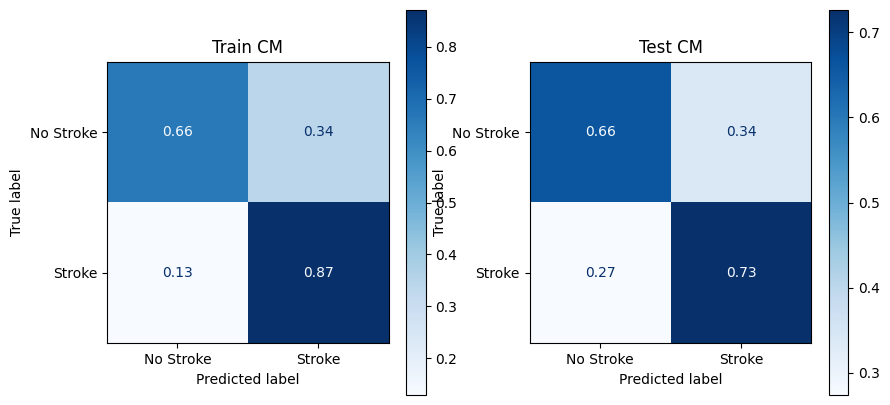

In [208]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

ConfusionMatrixDisplay.from_predictions(y2_train, preds_undersample_train,
                                        ax=axes[0], cmap='Blues', normalize='true', display_labels=labels)
axes[0].set_title('Train CM')

ConfusionMatrixDisplay.from_predictions(y2_test, preds_undersample_test,
                                        ax=axes[1], cmap='Blues', normalize='true', display_labels=labels)
axes[1].set_title('Test CM');

- This did not perform better with Feature Engineering.  The KNN with Under Sampling had lower False Negatives at 26% and lower False Positives at 31%.  It also had a higher Accuracy rate of 69%.  Recall was higher at 74% and Precision was also higher at 11%.  F1 Score on positive class was better without Feature Engineering as well at 19%.

## Feature Engineering with Best Logistic Regression

In [209]:
under_sampler = RandomUnderSampler()

under_logreg_pipe = make_sampler_pipeline(preprocessor, under_sampler, logreg)
under_logreg_pipe.fit(X2_train, y2_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4db10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4d720>)],
                                   verbose_feature_names_out=False)),
                ('randomundersampler', RandomUnderSampler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [210]:
# get predictions for train
preds_undersample_train = under_logreg_pipe.predict(X2_train)
# get prediction for test
preds_undersample_test = under_logreg_pipe.predict(X2_test)

print('Under Sample LOG REG Training accuracy:', under_logreg_pipe.score(X2_train, y2_train))
print('Under Sample LOG REG Testing accuracy:', under_logreg_pipe.score(X2_test, y2_test))
print('Train\n', classification_report(y2_train, preds_undersample_train,target_names=labels))
print('Test\n', classification_report(y2_test, preds_undersample_test, target_names=labels))

Under Sample LOG REG Training accuracy: 0.6883708467309754
Under Sample LOG REG Testing accuracy: 0.6738955823293172
Train
               precision    recall  f1-score   support

   No Stroke       0.99      0.68      0.81      3547
      Stroke       0.12      0.81      0.20       185

    accuracy                           0.69      3732
   macro avg       0.55      0.74      0.51      3732
weighted avg       0.94      0.69      0.78      3732

Test
               precision    recall  f1-score   support

   No Stroke       0.98      0.67      0.80      1183
      Stroke       0.11      0.76      0.19        62

    accuracy                           0.67      1245
   macro avg       0.54      0.71      0.49      1245
weighted avg       0.94      0.67      0.77      1245



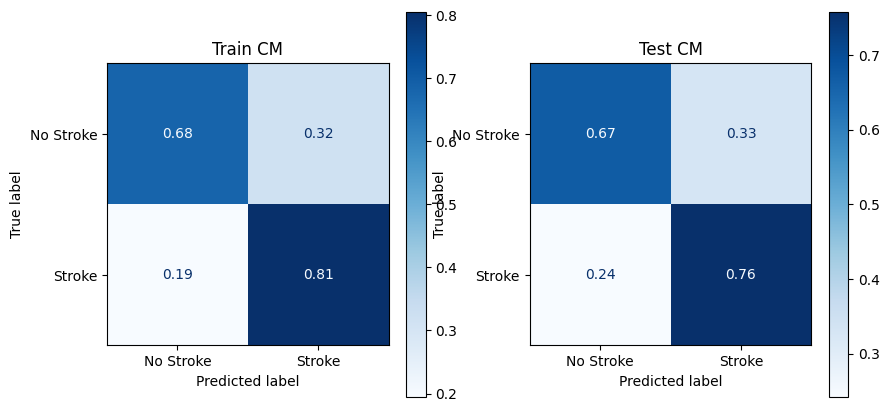

In [211]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y2_train, preds_undersample_train,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y2_test, preds_undersample_test,
                                        ax=axes[1], cmap='Blues',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

- This did not preform as well as the Under Sample Logistic Regression Model.

## Feature Engineering with Best Random Forest

In [212]:
under_sampler = RandomUnderSampler()

under_rf_pipe = make_sampler_pipeline(preprocessor, under_sampler, random_forest)
under_rf_pipe.fit(X2_train, y2_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4db10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4ea5d4d720>)],
                                   verbose_feature_names_out=False)),
                ('randomundersampler', RandomUnderSampler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [213]:
# get predictions for train
preds_undersample_train = under_rf_pipe.predict(X2_train)
# get prediction for test
preds_undersample_test = under_rf_pipe.predict(X2_test)

print('Under Sample RF Training accuracy:', under_rf_pipe.score(X2_train, y2_train))
print('Under Sample RF Testing accuracy:', under_rf_pipe.score(X2_test, y2_test))
print('Train\n', classification_report(y2_train, preds_undersample_train,target_names=labels))
print('Test\n', classification_report(y2_test, preds_undersample_test, target_names=labels))

Under Sample RF Training accuracy: 0.6736334405144695
Under Sample RF Testing accuracy: 0.6481927710843374
Train
               precision    recall  f1-score   support

   No Stroke       1.00      0.66      0.79      3547
      Stroke       0.13      1.00      0.23       185

    accuracy                           0.67      3732
   macro avg       0.57      0.83      0.51      3732
weighted avg       0.96      0.67      0.76      3732

Test
               precision    recall  f1-score   support

   No Stroke       0.98      0.64      0.78      1183
      Stroke       0.10      0.76      0.18        62

    accuracy                           0.65      1245
   macro avg       0.54      0.70      0.48      1245
weighted avg       0.94      0.65      0.75      1245



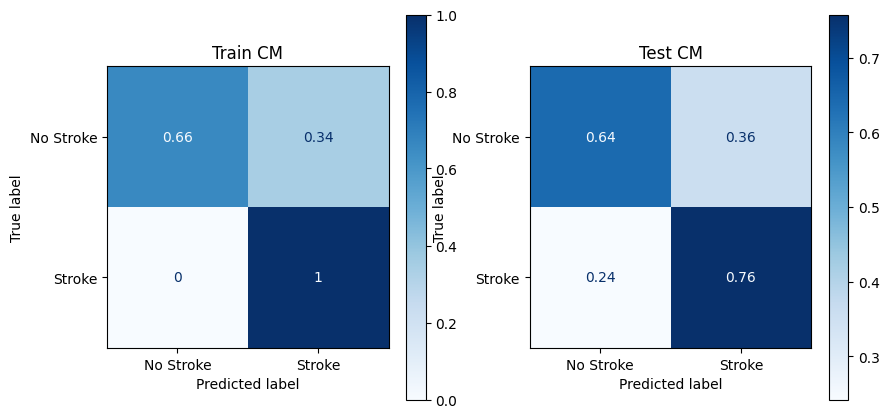

In [214]:
 #Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y2_train, preds_undersample_train,
                                        ax=axes[0], cmap='Blues',normalize='true', display_labels=labels)

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y2_test, preds_undersample_test,
                                        ax=axes[1], cmap='Blues',normalize='true', display_labels=labels)

axes[1].set_title('Test CM');

- The Feature Engineer model did not perform as well as the Under Sample Random Forest Model.

# Recommendations and Final Evaluation of all Models

For this business problem, we want to look at F1 score more than the accuracy.  This is an extremely unbalanced class so accuracy will not be a good metric.  Recall in terms of stroke diagnosis would be the percentage of patients who actually have a stroke and are correctly identified by the model. Recall is important metric because missing a stroke case can have serious consequence for the patient's health and recovery.

 - Overall Random Forest with Under Sampling gave the best results with the lowest False Negatives (Type II Errors) at 18%.  The F1 score of our positive class (Stroke) was 21%.  Accuracy was 69%.  It also had the highest recall on the positive class of 82%.